# Notebook para manipulación de Señales digitales.

Desarrollado por Juan Manuel Grosso, Martin Haimovich, Guido Santoro e Ignacio Veiga, en el marco de la materia Señales y Sistemas, profesora Trina Adrián, para la carrera de Ingeniería de Sonido en la Universidad Nacional de Tres de Febrero.

#### Bienvenido Usuario!

Primero, importaremos librerías necesarias para el procesamiento que realizaremos. Destacamos la importancia de ejecutar secuencialmente y de forma ordenada los bloques para que no haya problema con la definición de las variables. Siéntase libre de modificar alguna de las variables comentadas para ver variaciones en los resultados.


In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import scipy
import scipy.io.wavfile as wav
import fftplot as fftplt
from scipy.fftpack import fft, ifft
from matplotlib.pyplot import figure
import generador as gen
import IPython.display as ipd


Las primeras variables a definir son los límites temporales y la frecuencia de muestreo para nuestro vector temporal. Es fundamental ejecutar el siguiente bloque antes que cualquier otro.


In [2]:
samplerate = 8000  #Frecuencia de Muestreo
timestart=0       #Tiempo Inicial
timestop=1         #Tiempo Final
timestep=1/samplerate           
timevec = np.arange(timestart,timestop,timestep)   #Vector Temporal
N=48000          #Cantidad de puntos de la FFT

## Sección 4: Filtraje

En esta sección se pueden aplicar distintos filtros a señales digitales y ver sus efectos.

### Lectura y muestreo de archivos .wav

Text(0.5, 1.0, 'Voz Femenina')

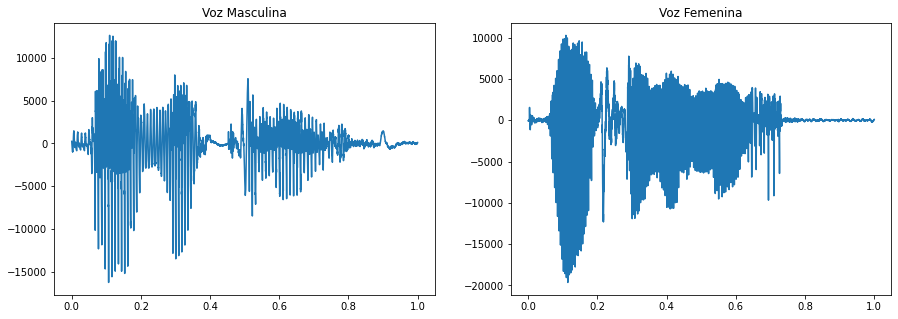

In [3]:
# importamos las señales Voz masculina y Voz femenina
samplerateVM, sigVMH = wav.read('Voz masculina.wav')
samplerateVF, sigVFH = wav.read('Voz femenina.wav')

sigVM=signal.decimate(sigVMH, 6, n=None, ftype='iir', axis=- 1, zero_phase=True)
sigVF=signal.decimate(sigVFH, 6, n=None, ftype='iir', axis=- 1, zero_phase=True)

samplerateVM=samplerate
samplerateVF=samplerate

duracionVM = np.size(sigVM) / samplerate  # operación para obtener la duración de la señal
timevecVM = np.linspace(0, duracionVM, np.size(sigVM))  # vector tiempo
duracionVF = np.size(sigVF) / samplerate  # operación para obtener la duración de la señal
timevecVF = np.linspace(0, duracionVF, np.size(sigVF))  # vector tiempo

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(timevecVM,sigVM)
ax2.plot(timevecVF,sigVF)
ax1.set_title('Voz Masculina')
ax2.set_title('Voz Femenina')

### Chirp y Suma de Senoidales

Text(0.5, 1.0, 'Chirp')

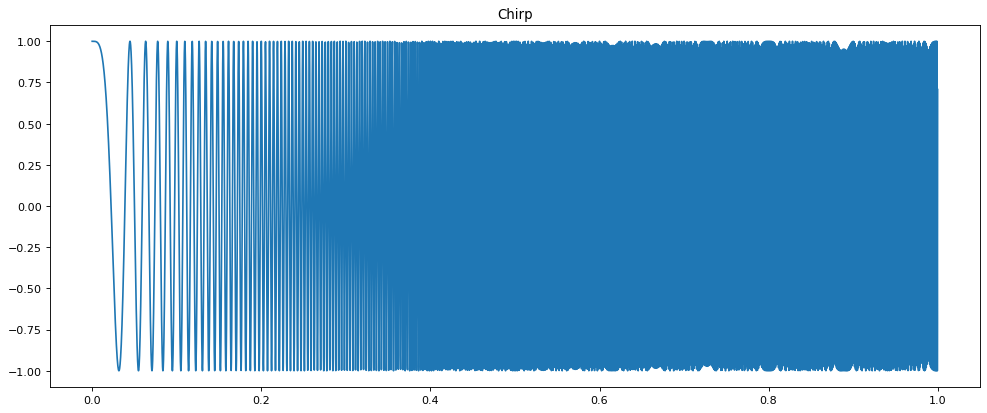

In [4]:
flimchirp=1000
chirp = signal.chirp(t=timevec, f0=0, t1=1, f1=flimchirp, method='linear', phi=0, vertex_zero=True)

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(timevec,chirp)
plt.title('Chirp')

Text(0.5, 1.0, 'Suma de Senoidales')

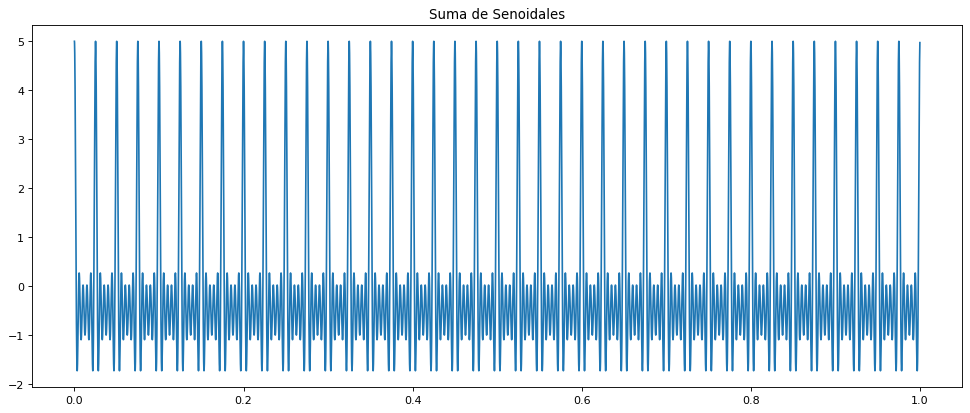

In [5]:
f1=samplerate/200

sin1=gen.generador(timevec, samplerate, 1, 0, f1, 0, 50, 0.5, 1, 0.5, 1)
sin2=gen.generador(timevec, samplerate, 1, 0, 2*f1, 0, 50, 0.5, 1, 0.5, 1)
sin3=gen.generador(timevec, samplerate, 1, 0, 3*f1, 0, 50, 0.5, 1, 0.5, 1)
sin4=gen.generador(timevec, samplerate, 1, 0, 4*f1, 0, 50, 0.5, 1, 0.5, 1)
sin5=gen.generador(timevec, samplerate, 1, 0, 5*f1, 0, 50, 0.5, 1, 0.5, 1)

sinsum=sin1+sin2+sin3+sin4+sin5

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(timevec,sinsum)
plt.title('Suma de Senoidales')

# Filtros

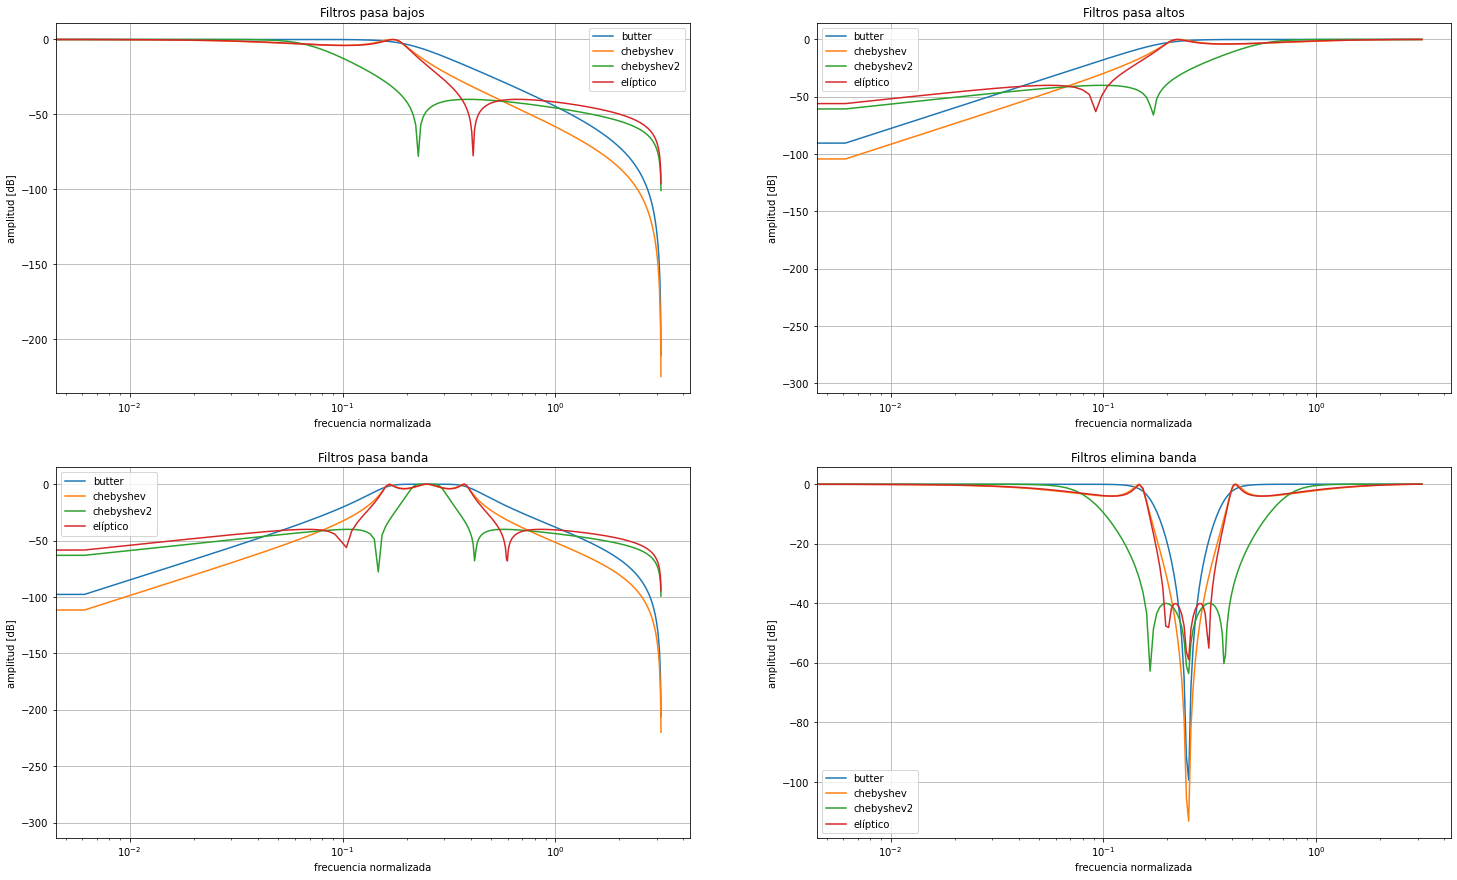

In [6]:
fc = 250  # frecuencia de corte del filtro
wc = fc / (0.5*samplerate)  # frecuencia normalizada para el filtro digital
fp = [200,500]     # Banda para filtros Bandpass/Bandstop
arraysr=np.array(0.5*samplerate)
wp = fp / arraysr      # Banda normalizada para el filtro digital
rp=4     #Máximo ripple, en dB (chebyshev, ellip)
rs=40     #Mínima atenuación en banda rechazada, en dB (chebyshev, ellip)



# se obtienen los coeficientes de la función de transferencia del filtro
# Butterworth lowpass
b1, a1 = signal.butter(N=3, Wn=wc, btype='low')

# Chebyshev 1 Lowpass
b2, a2 = signal.cheby1(N=3, rp=rp, Wn=wc, btype='low')

# Chebyshev 2 Lowpass
b3, a3 = signal.cheby2(N=3, rs=rs, Wn=wc, btype='low')

# Elíptico Lowpass
b4, a4 = signal.ellip(N=3, rp=rp, rs=rs, Wn=wc, btype='low')

# Butterworth Highpass
b5, a5 = signal.butter(N=3, Wn=wc, btype='highpass')

# Chebyshev 1 Highpass
b6, a6 = signal.cheby1(N=3, rp=rp, Wn=wc, btype='highpass')

# Chebyshev 2 Highpass
b7, a7 = signal.cheby2(N=3, rs=rs, Wn=wc, btype='highpass')

# Elíptico Highpass
b8, a8 = signal.ellip(N=3, rp=rp, rs=rs, Wn=wc, btype='highpass')

# Butterworth Bandpass
b9, a9 = signal.butter(N=3, Wn=wp, btype='band')

# Chebyshev 1 Bandpass
b10, a10 = signal.cheby1(N=3, rp=rp, Wn=wp, btype='band')

# Chebyshev 2 Bandpass
b11, a11 = signal.cheby2(N=3, rs=rs, Wn=wp, btype='band')

# Elíptico Bandpass
b12, a12 = signal.ellip(N=3, rp=rp, rs=rs, Wn=wp, btype='band')

# Butterworth Bandstop
b13, a13 = signal.butter(N=3, Wn=wp, btype='bandstop')

# Chebyshev 1 Bandstop
b14, a14 = signal.cheby1(N=3, rp=rp, Wn=wp, btype='bandstop')

# Chebyshev 2 Bandstop
b15, a15 = signal.cheby2(N=3, rs=rs, Wn=wp, btype='bandstop')

# Elíptico Bandstop
b16, a16 = signal.ellip(N=3, rp=rp, rs=rs, Wn=wp, btype='bandstop')


w1, h1 = signal.freqz(b1,a1)
w2, h2 = signal.freqz(b2,a2)
w3, h3 = signal.freqz(b3,a3)
w4, h4 = signal.freqz(b4,a4)
w5, h5 = signal.freqz(b5,a5)
w6, h6 = signal.freqz(b6,a6)
w7, h7 = signal.freqz(b7,a7)
w8, h8 = signal.freqz(b8,a8)
w9, h9 = signal.freqz(b9,a9)
w10, h10 = signal.freqz(b10,a10)
w11, h11 = signal.freqz(b11,a11)
w12, h12 = signal.freqz(b12,a12)
w13, h13 = signal.freqz(b13,a13)
w14, h14 = signal.freqz(b14,a14)
w15, h15 = signal.freqz(b15,a15)
w16, h16 = signal.freqz(b16,a16)


#En grupos de filtrado:
plt.figure(figsize=(25,15))
plt.subplot(221)
plt.semilogx(w1, 20 * np.log10(abs(h1)), label='butter')
plt.semilogx(w2, 20 * np.log10(abs(h2)), label='chebyshev')
plt.semilogx(w3, 20 * np.log10(abs(h3)), label='chebyshev2')
plt.semilogx(w4, 20 * np.log10(abs(h4)), label='elíptico')
plt.title('Filtros pasa bajos')
plt.legend()
plt.xlabel('frecuencia normalizada')
plt.ylabel('amplitud [dB]')
plt.grid()

plt.subplot(222)
plt.semilogx(w5, 20 * np.log10(abs(h5)), label='butter')
plt.semilogx(w6, 20 * np.log10(abs(h6)), label='chebyshev')
plt.semilogx(w7, 20 * np.log10(abs(h7)), label='chebyshev2')
plt.semilogx(w8, 20 * np.log10(abs(h8)), label='elíptico')
plt.title('Filtros pasa altos')
plt.legend()
plt.xlabel('frecuencia normalizada')
plt.ylabel('amplitud [dB]')
plt.grid()

plt.subplot(223)
plt.semilogx(w9, 20 * np.log10(abs(np.where(0==h9, 0.0001, h9))), label='butter')
plt.semilogx(w10, 20 * np.log10(abs(np.where(0==h10, 0.0001, h10))), label='chebyshev')
plt.semilogx(w11, 20 * np.log10(abs(np.where(0==h11, 0.0001, h11))), label='chebyshev2')
plt.semilogx(w12, 20 * np.log10(abs(np.where(0==h12, 0.0001, h12))), label='elíptico')
plt.title('Filtros pasa banda')
plt.legend()
plt.xlabel('frecuencia normalizada')
plt.ylabel('amplitud [dB]')
plt.grid()

plt.subplot(224)
plt.semilogx(w13, 20 * np.log10(abs(h13)), label='butter')
plt.semilogx(w14, 20 * np.log10(abs(h14)), label='chebyshev')
plt.semilogx(w15, 20 * np.log10(abs(h15)), label='chebyshev2')
plt.semilogx(w16, 20 * np.log10(abs(h16)), label='elíptico')
plt.title('Filtros elimina banda')
plt.legend()
plt.xlabel('frecuencia normalizada')
plt.ylabel('amplitud [dB]')
plt.grid()

### Voz Masculina - Filtro Butterworth Lowpass

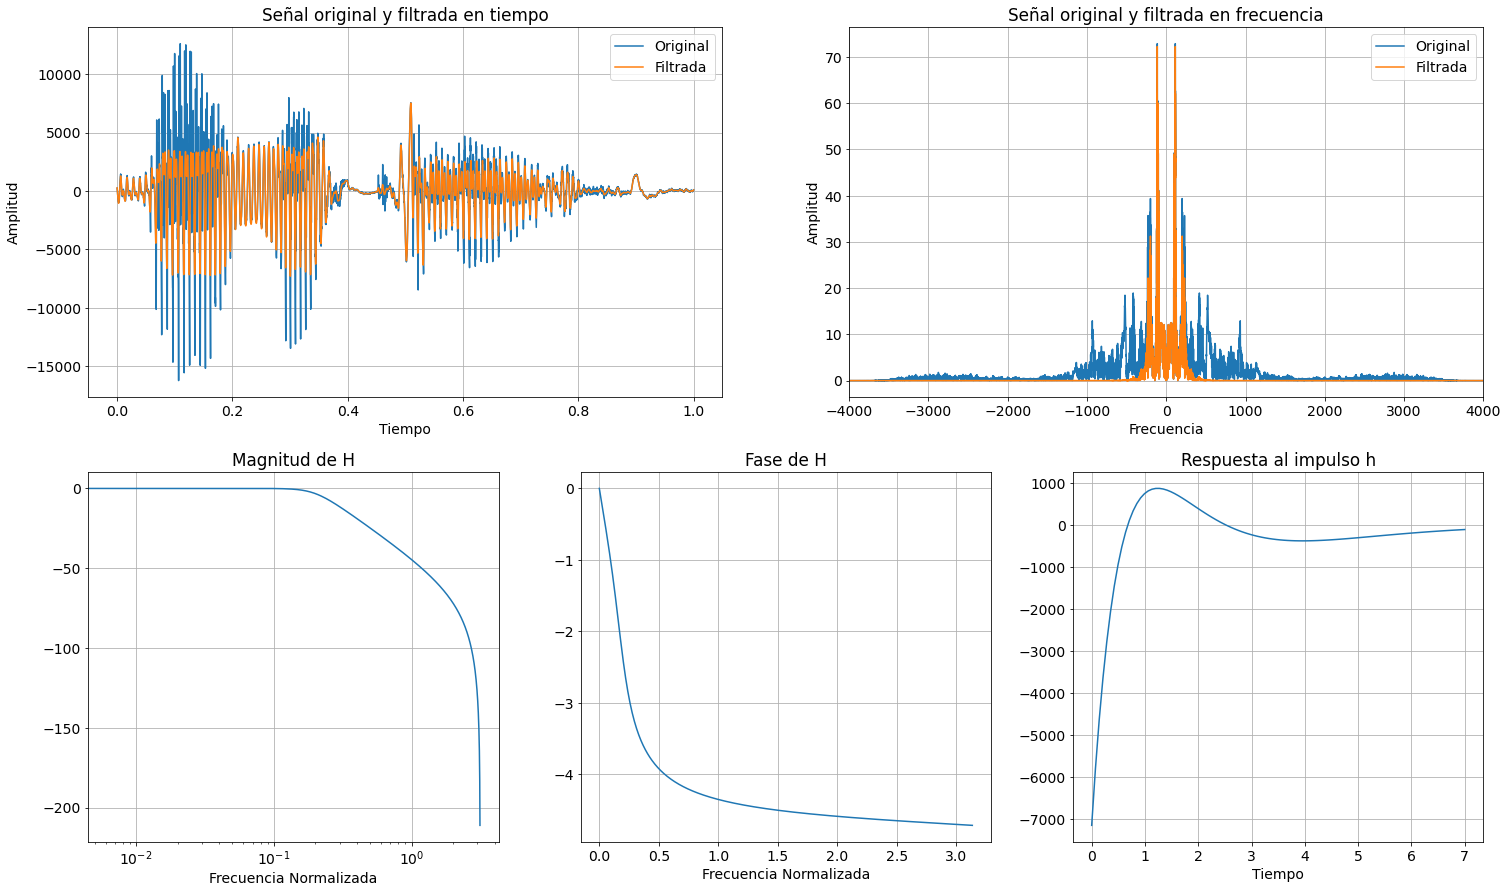

In [62]:
origsig=sigVM          #Señal a Filtrar
bfn, afn = b1, a1      #Tipo de Filtro (índices an, bn)
sig_filt = signal.filtfilt(bfn, afn, origsig)
wfn, hfn = signal.freqz(bfn,afn)
labelfilt = 'butter lowpass'     #nombre del filtro

t,y=signal.impulse2((afn,bfn))
respuesta_fase = np.unwrap(np.angle(hfn))


Xo= fft(origsig,N)
X = fft(sig_filt,N)
lim = int(np.ceil((N+1)/2) - 1)
Xo = np.append(Xo[lim:1:-1], Xo[0:lim])
X = np.append(X[lim:1:-1], X[0:lim])
MXo = np.abs(Xo)
MXo = MXo / np.size(MXo)
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 14})
plt.subplot (221)
plt.title('Señal original y filtrada en tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(timevec,origsig, label = 'Original')
plt.plot(timevec,sig_filt, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (222)
plt.title('Señal original y filtrada en frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-4000,4000)
plt.plot(f,MXo, label = 'Original')
plt.plot(f,MX, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (234)
plt.title('Magnitud de H')
plt.xlabel('Frecuencia Normalizada')
plt.semilogx(wfn, 20 * np.log10(abs(hfn)), label=labelfilt)
plt.grid()
plt.subplot (235)
plt.title('Fase de H')
plt.xlabel('Frecuencia Normalizada')
plt.plot(wfn, respuesta_fase, label = labelfilt)
plt.grid()
plt.subplot (236)
plt.title('Respuesta al impulso h')
plt.xlabel('Tiempo')
plt.plot(t,y)
plt.grid()

In [8]:
ipd.Audio(sigVM, rate=samplerate) #Audio Original

In [9]:
ipd.Audio(sig_filt, rate=samplerate) #Audio Filtrado

In [56]:
#Opcional: guardar la señal en .wav

sig_filt = sig_filt.astype(np.int16)  # paso intermedio para generar el wav correctamente
                                      # el filtro devuelve los datos en float64, pero para generar el wav
                                      # necesitamos int

wavname = 'filt'          #Asignar nombre al wav a guardar
wav.write(wavname, samplerate, sig_filt)

### Voz Femenina - Filtro Chebyshev 1 Lowpass

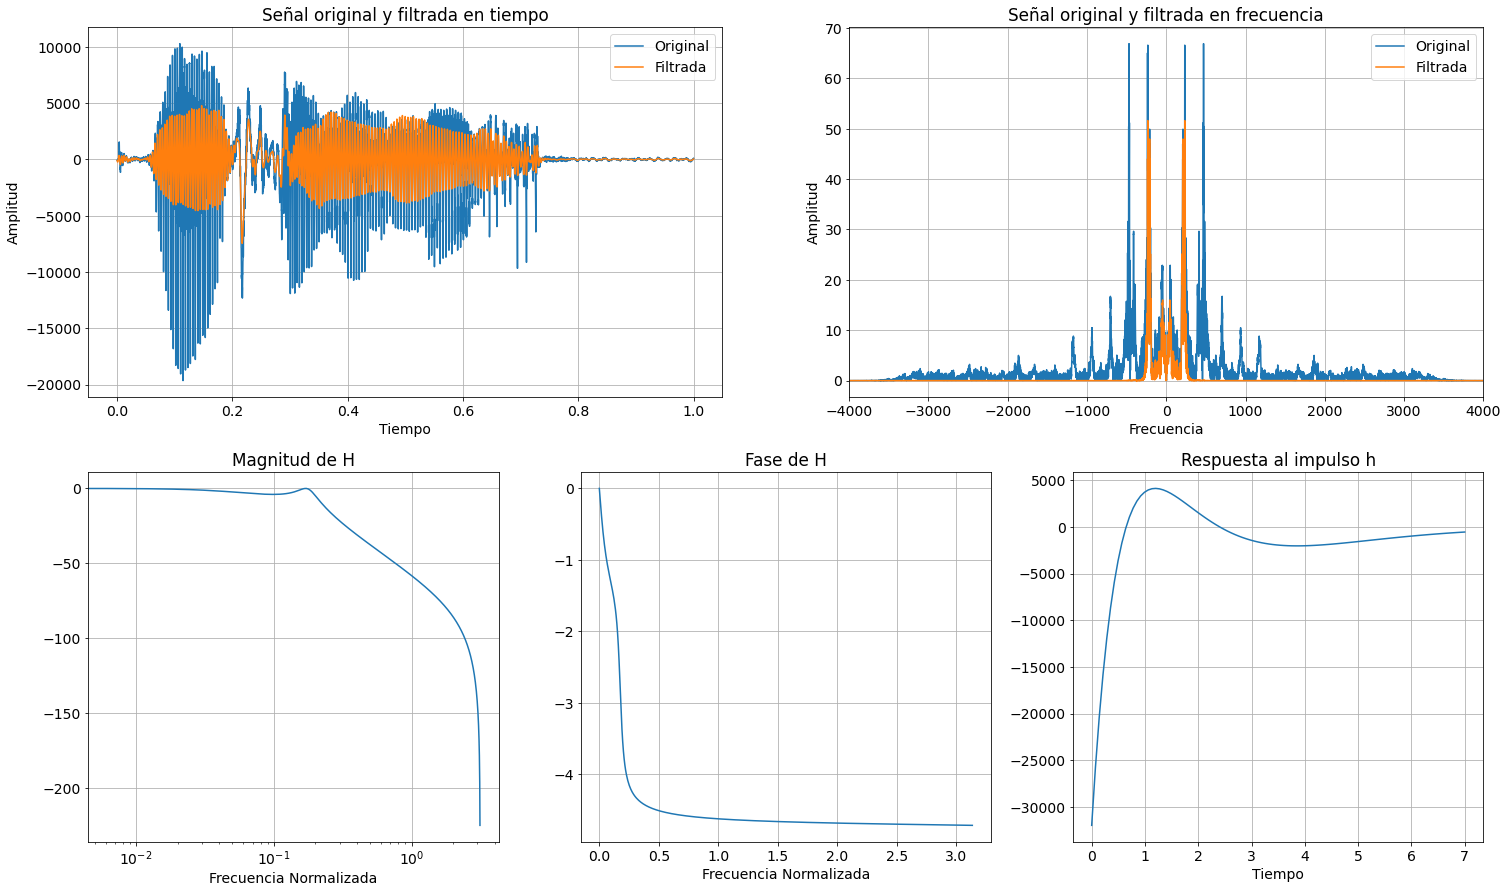

In [10]:
origsig=sigVF          #Señal a Filtrar
bfn, afn = b2, a2      #Tipo de Filtro (índices an, bn)
sig_filt = signal.filtfilt(bfn, afn, origsig)
wfn, hfn = signal.freqz(bfn,afn)
labelfilt = 'cheby1 lowpass'

t,y=signal.impulse2((afn,bfn))
respuesta_fase = np.unwrap(np.angle(hfn))


Xo= fft(origsig,N)
X = fft(sig_filt,N)
lim = int(np.ceil((N+1)/2) - 1)
Xo = np.append(Xo[lim:1:-1], Xo[0:lim])
X = np.append(X[lim:1:-1], X[0:lim])
MXo = np.abs(Xo)
MXo = MXo / np.size(MXo)
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 14})
plt.subplot (221)
plt.title('Señal original y filtrada en tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(timevec,origsig, label = 'Original')
plt.plot(timevec,sig_filt, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (222)
plt.title('Señal original y filtrada en frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-4000,4000)
plt.plot(f,MXo, label = 'Original')
plt.plot(f,MX, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (234)
plt.title('Magnitud de H')
plt.xlabel('Frecuencia Normalizada')
plt.semilogx(wfn, 20 * np.log10(abs(hfn)), label=labelfilt)
plt.grid()
plt.subplot (235)
plt.title('Fase de H')
plt.xlabel('Frecuencia Normalizada')
plt.plot(wfn, respuesta_fase, label = labelfilt)
plt.grid()
plt.subplot (236)
plt.title('Respuesta al impulso h')
plt.xlabel('Tiempo')
plt.plot(t,y)
plt.grid()

In [11]:
ipd.Audio(sigVF, rate=samplerate) #Audio Original

In [12]:
ipd.Audio(sig_filt, rate=samplerate) #Audio Filtrado

### Chirp - Filtro Chebyshev 2 Lowpass

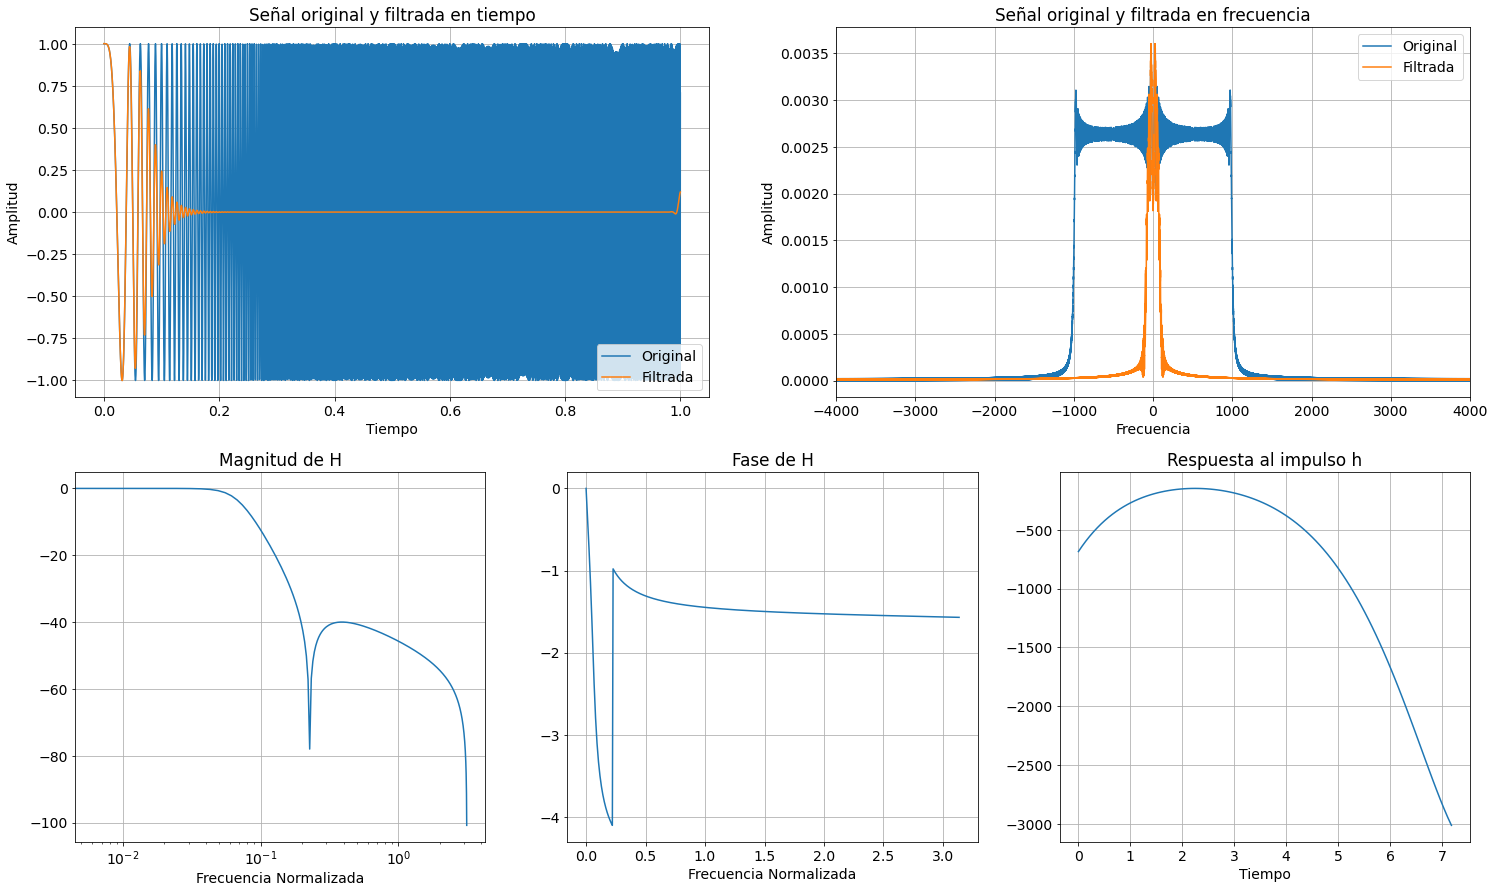

In [13]:
origsig=chirp          #Señal a Filtrar
bfn, afn = b3, a3      #Tipo de Filtro (índices an, bn)
sig_filt = signal.filtfilt(bfn, afn, origsig)
wfn, hfn = signal.freqz(bfn,afn)
labelfilt = 'cheby2 lowpass'

t,y=signal.impulse2((afn,bfn))
respuesta_fase = np.unwrap(np.angle(hfn))


Xo= fft(origsig,N)
X = fft(sig_filt,N)
lim = int(np.ceil((N+1)/2) - 1)
Xo = np.append(Xo[lim:1:-1], Xo[0:lim])
X = np.append(X[lim:1:-1], X[0:lim])
MXo = np.abs(Xo)
MXo = MXo / np.size(MXo)
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 14})
plt.subplot (221)
plt.title('Señal original y filtrada en tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(timevec,origsig, label = 'Original')
plt.plot(timevec,sig_filt, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (222)
plt.title('Señal original y filtrada en frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-4000,4000)
plt.plot(f,MXo, label = 'Original')
plt.plot(f,MX, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (234)
plt.title('Magnitud de H')
plt.xlabel('Frecuencia Normalizada')
plt.semilogx(wfn, 20 * np.log10(abs(hfn)), label=labelfilt)
plt.grid()
plt.subplot (235)
plt.title('Fase de H')
plt.xlabel('Frecuencia Normalizada')
plt.plot(wfn, respuesta_fase, label = labelfilt)
plt.grid()
plt.subplot (236)
plt.title('Respuesta al impulso h')
plt.xlabel('Tiempo')
plt.plot(t,y)
plt.grid()

In [14]:
ipd.Audio(chirp, rate=samplerate)     #Audio Original

In [15]:
ipd.Audio(sig_filt, rate=samplerate)     #Audio Filtrado

### Suma de Senoides - Filtro Elíptico Lowpass

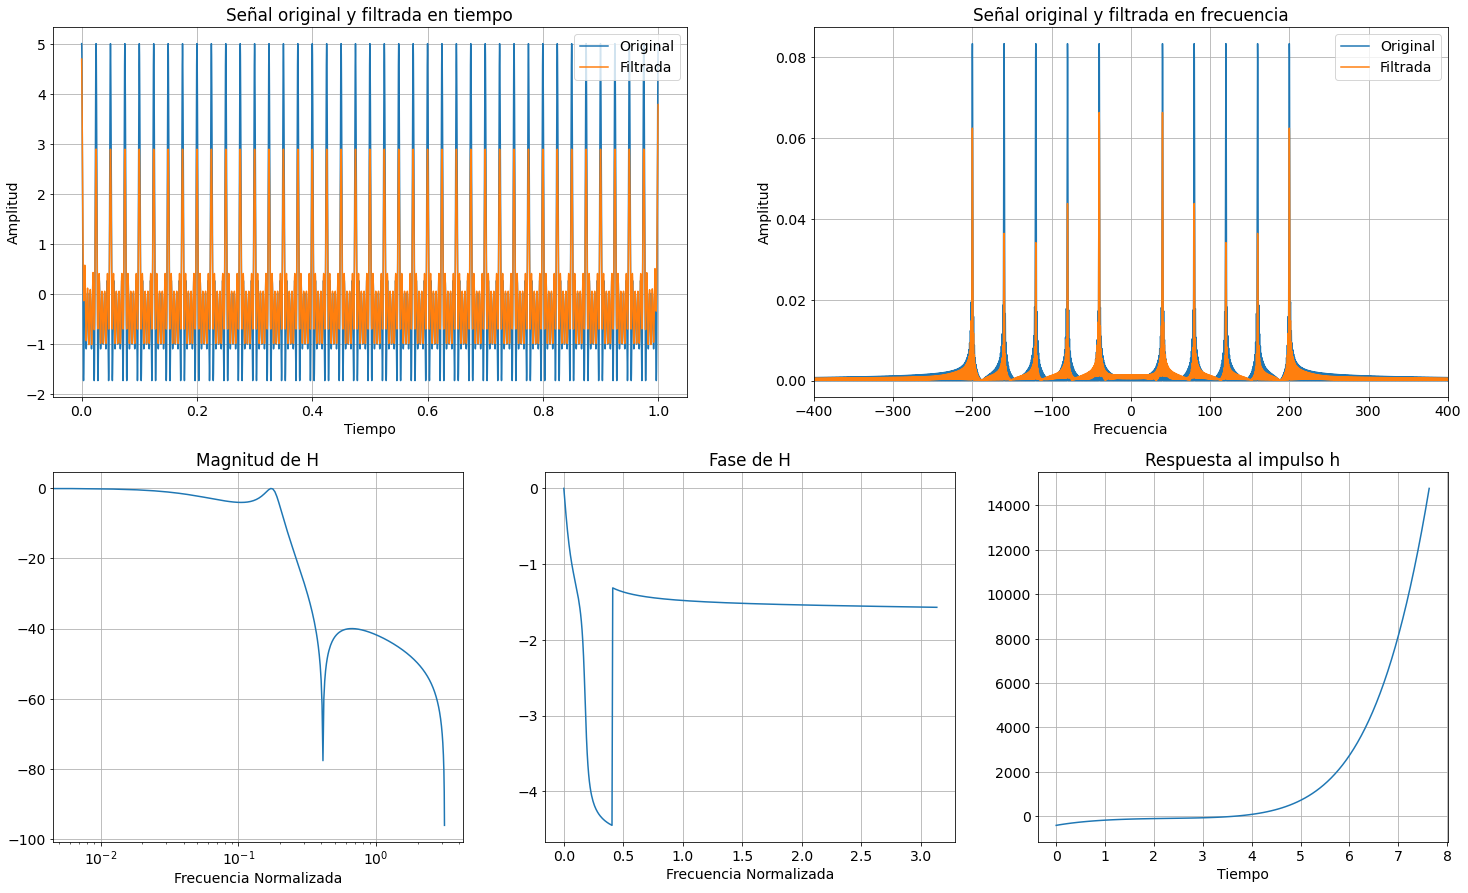

In [58]:
origsig=sinsum          #Señal a Filtrar
bfn, afn = b4, a4       #Tipo de Filtro (índices an, bn)
sig_filt = signal.filtfilt(bfn, afn, origsig)
wfn, hfn = signal.freqz(bfn,afn)
labelfilt = 'ellip lowpass'

t,y=signal.impulse2((afn,bfn))
respuesta_fase = np.unwrap(np.angle(hfn))


Xo= fft(origsig,N)
X = fft(sig_filt,N)
lim = int(np.ceil((N+1)/2) - 1)
Xo = np.append(Xo[lim:1:-1], Xo[0:lim])
X = np.append(X[lim:1:-1], X[0:lim])
MXo = np.abs(Xo)
MXo = MXo / np.size(MXo)
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 14})
plt.subplot (221)
plt.title('Señal original y filtrada en tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(timevec,origsig, label = 'Original')
plt.plot(timevec,sig_filt, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (222)
plt.title('Señal original y filtrada en frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-400,400)
plt.plot(f,MXo, label = 'Original')
plt.plot(f,MX, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (234)
plt.title('Magnitud de H')
plt.xlabel('Frecuencia Normalizada')
plt.semilogx(wfn, 20 * np.log10(abs(hfn)), label=labelfilt)
plt.grid()
plt.subplot (235)
plt.title('Fase de H')
plt.xlabel('Frecuencia Normalizada')
plt.plot(wfn, respuesta_fase, label = labelfilt)
plt.grid()
plt.subplot (236)
plt.title('Respuesta al impulso h')
plt.xlabel('Tiempo')
plt.plot(t,y)
plt.grid()

In [17]:
ipd.Audio(origsig, rate=samplerate)     #Audio Original

In [18]:
ipd.Audio(sig_filt, rate=samplerate)     #Audio Filtrado

### Voz Femenina - Filtro Butterworth Highpass

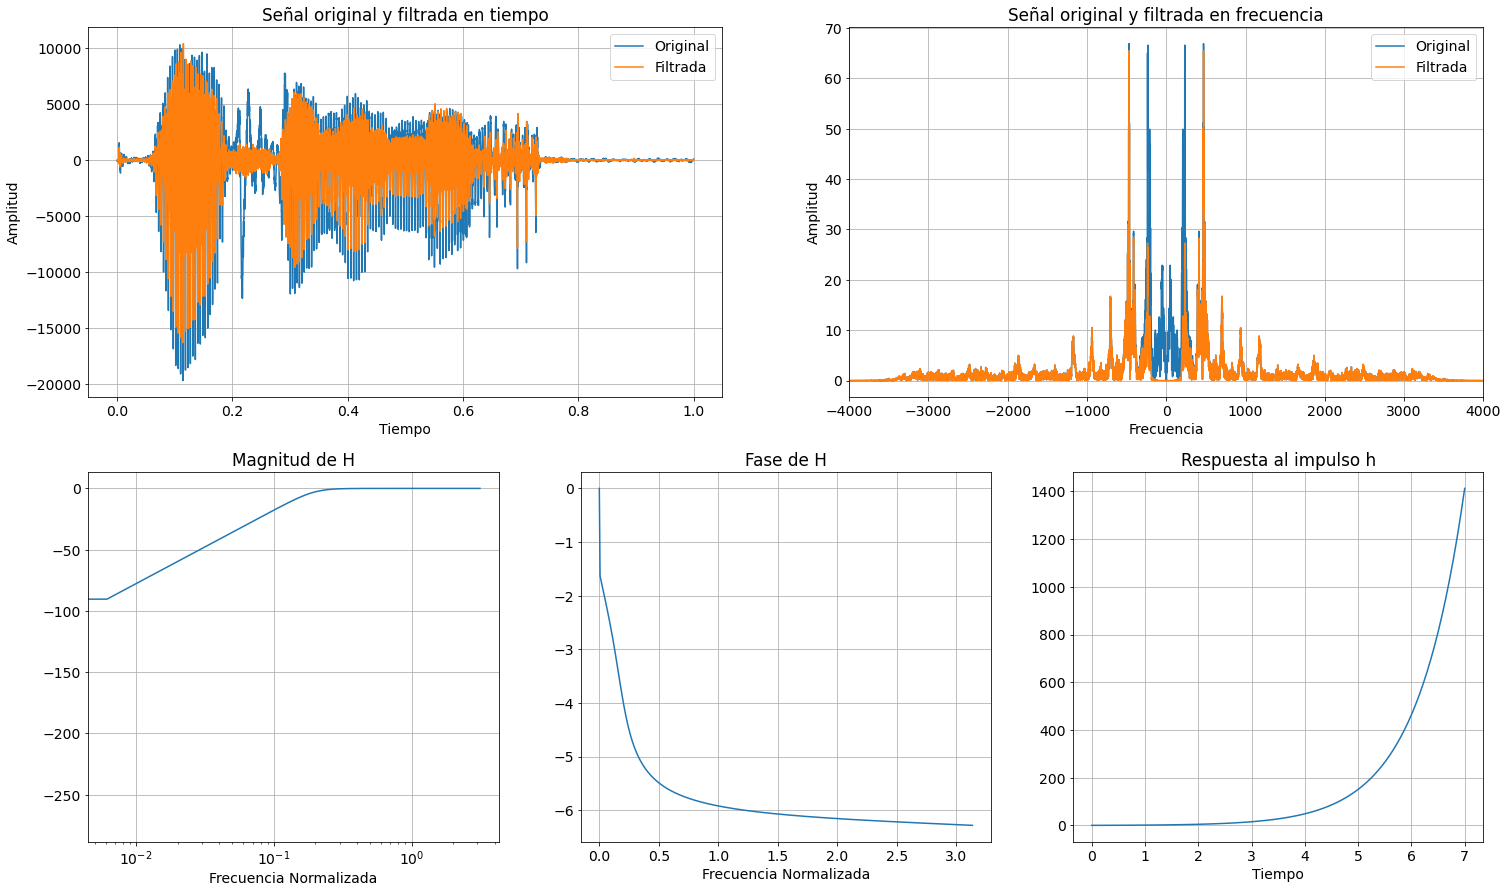

In [19]:
origsig=sigVF          #Señal a Filtrar
bfn, afn = b5, a5      #Tipo de Filtro (índices an, bn)
sig_filt = signal.filtfilt(bfn, afn, origsig)
wfn, hfn = signal.freqz(bfn,afn)
labelfilt = 'butter highpass'

t,y=signal.impulse2((afn,bfn))
respuesta_fase = np.unwrap(np.angle(hfn))


Xo= fft(origsig,N)
X = fft(sig_filt,N)
lim = int(np.ceil((N+1)/2) - 1)
Xo = np.append(Xo[lim:1:-1], Xo[0:lim])
X = np.append(X[lim:1:-1], X[0:lim])
MXo = np.abs(Xo)
MXo = MXo / np.size(MXo)
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 14})
plt.subplot (221)
plt.title('Señal original y filtrada en tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(timevec,origsig, label = 'Original')
plt.plot(timevec,sig_filt, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (222)
plt.title('Señal original y filtrada en frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-4000,4000)
plt.plot(f,MXo, label = 'Original')
plt.plot(f,MX, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (234)
plt.title('Magnitud de H')
plt.xlabel('Frecuencia Normalizada')
plt.semilogx(wfn, 20 * np.log10(abs(hfn)), label=labelfilt)
plt.grid()
plt.subplot (235)
plt.title('Fase de H')
plt.xlabel('Frecuencia Normalizada')
plt.plot(wfn, respuesta_fase, label = labelfilt)
plt.grid()
plt.subplot (236)
plt.title('Respuesta al impulso h')
plt.xlabel('Tiempo')
plt.plot(t,y)
plt.grid()

In [20]:
ipd.Audio(origsig, rate=samplerate)     #Audio Original

In [21]:
ipd.Audio(sig_filt, rate=samplerate)     #Audio Filtrado

### Chirp - Filtro Chebyshev 1 Highpass

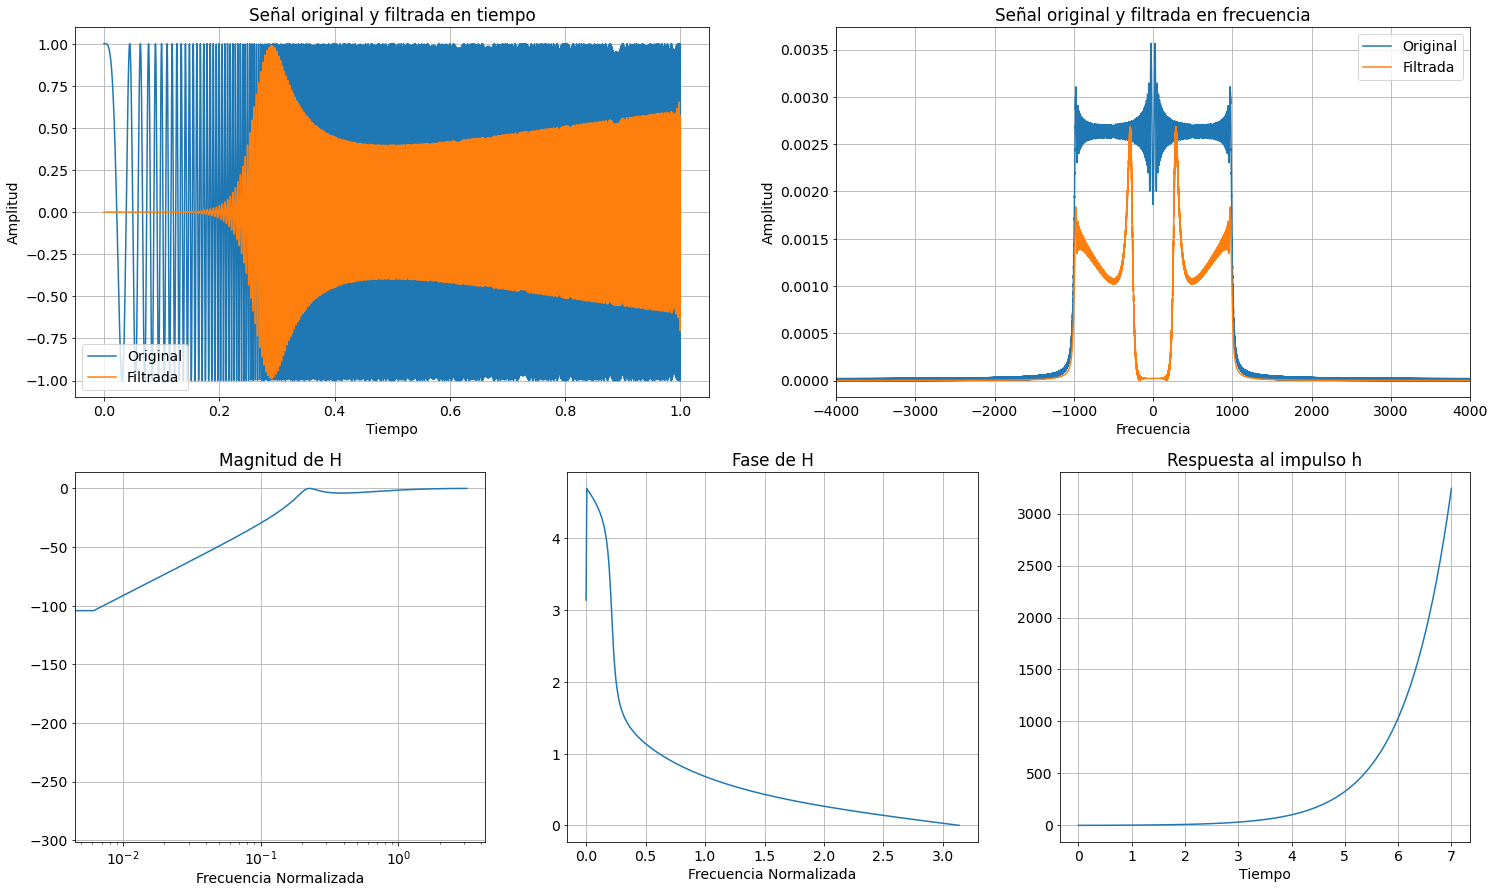

In [22]:
origsig=chirp          #Señal a Filtrar
bfn, afn = b6, a6      #Tipo de Filtro (índices an, bn)
sig_filt = signal.filtfilt(bfn, afn, origsig)
wfn, hfn = signal.freqz(bfn,afn)
labelfilt = 'cheby1 highpass'

t,y=signal.impulse2((afn,bfn))
respuesta_fase = np.unwrap(np.angle(hfn))


Xo= fft(origsig,N)
X = fft(sig_filt,N)
lim = int(np.ceil((N+1)/2) - 1)
Xo = np.append(Xo[lim:1:-1], Xo[0:lim])
X = np.append(X[lim:1:-1], X[0:lim])
MXo = np.abs(Xo)
MXo = MXo / np.size(MXo)
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 14})
plt.subplot (221)
plt.title('Señal original y filtrada en tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(timevec,origsig, label = 'Original')
plt.plot(timevec,sig_filt, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (222)
plt.title('Señal original y filtrada en frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-4000,4000)
plt.plot(f,MXo, label = 'Original')
plt.plot(f,MX, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (234)
plt.title('Magnitud de H')
plt.xlabel('Frecuencia Normalizada')
plt.semilogx(wfn, 20 * np.log10(abs(hfn)), label=labelfilt)
plt.grid()
plt.subplot (235)
plt.title('Fase de H')
plt.xlabel('Frecuencia Normalizada')
plt.plot(wfn, respuesta_fase, label = labelfilt)
plt.grid()
plt.subplot (236)
plt.title('Respuesta al impulso h')
plt.xlabel('Tiempo')
plt.plot(t,y)
plt.grid()

In [23]:
ipd.Audio(origsig, rate=samplerate)     #Audio Original

In [24]:
ipd.Audio(sig_filt, rate=samplerate)     #Audio Filtrado

### Suma de Senoides - Filtro Chebyshev 2 Highpass

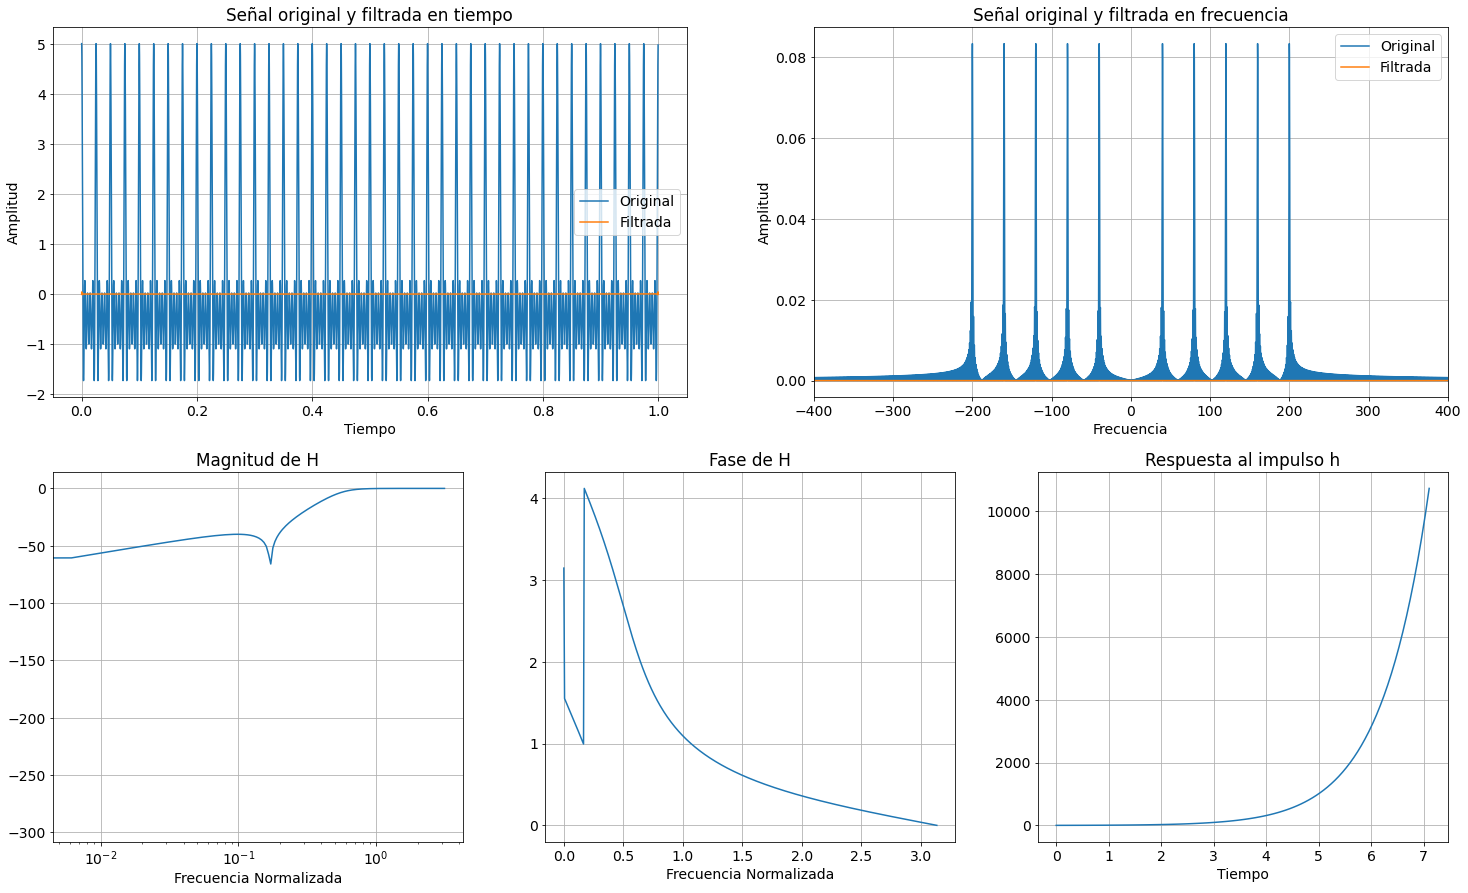

In [59]:
origsig=sinsum          #Señal a Filtrar
bfn, afn = b7, a7       #Tipo de Filtro (índices an, bn)
sig_filt = signal.filtfilt(bfn, afn, origsig)
wfn, hfn = signal.freqz(bfn,afn)
labelfilt = 'cheby2 highpass'

t,y=signal.impulse2((afn,bfn))
respuesta_fase = np.unwrap(np.angle(hfn))


Xo= fft(origsig,N)
X = fft(sig_filt,N)
lim = int(np.ceil((N+1)/2) - 1)
Xo = np.append(Xo[lim:1:-1], Xo[0:lim])
X = np.append(X[lim:1:-1], X[0:lim])
MXo = np.abs(Xo)
MXo = MXo / np.size(MXo)
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 14})
plt.subplot (221)
plt.title('Señal original y filtrada en tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(timevec,origsig, label = 'Original')
plt.plot(timevec,sig_filt, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (222)
plt.title('Señal original y filtrada en frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-400,400)
plt.plot(f,MXo, label = 'Original')
plt.plot(f,MX, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (234)
plt.title('Magnitud de H')
plt.xlabel('Frecuencia Normalizada')
plt.semilogx(wfn, 20 * np.log10(abs(hfn)), label=labelfilt)
plt.grid()
plt.subplot (235)
plt.title('Fase de H')
plt.xlabel('Frecuencia Normalizada')
plt.plot(wfn, respuesta_fase, label = labelfilt)
plt.grid()
plt.subplot (236)
plt.title('Respuesta al impulso h')
plt.xlabel('Tiempo')
plt.plot(t,y)
plt.grid()

In [26]:
ipd.Audio(origsig, rate=samplerate)     #Audio Original

In [27]:
ipd.Audio(sig_filt, rate=samplerate)     #Audio Filtrado

### Voz Masculina - Filtro Elíptico Highpass

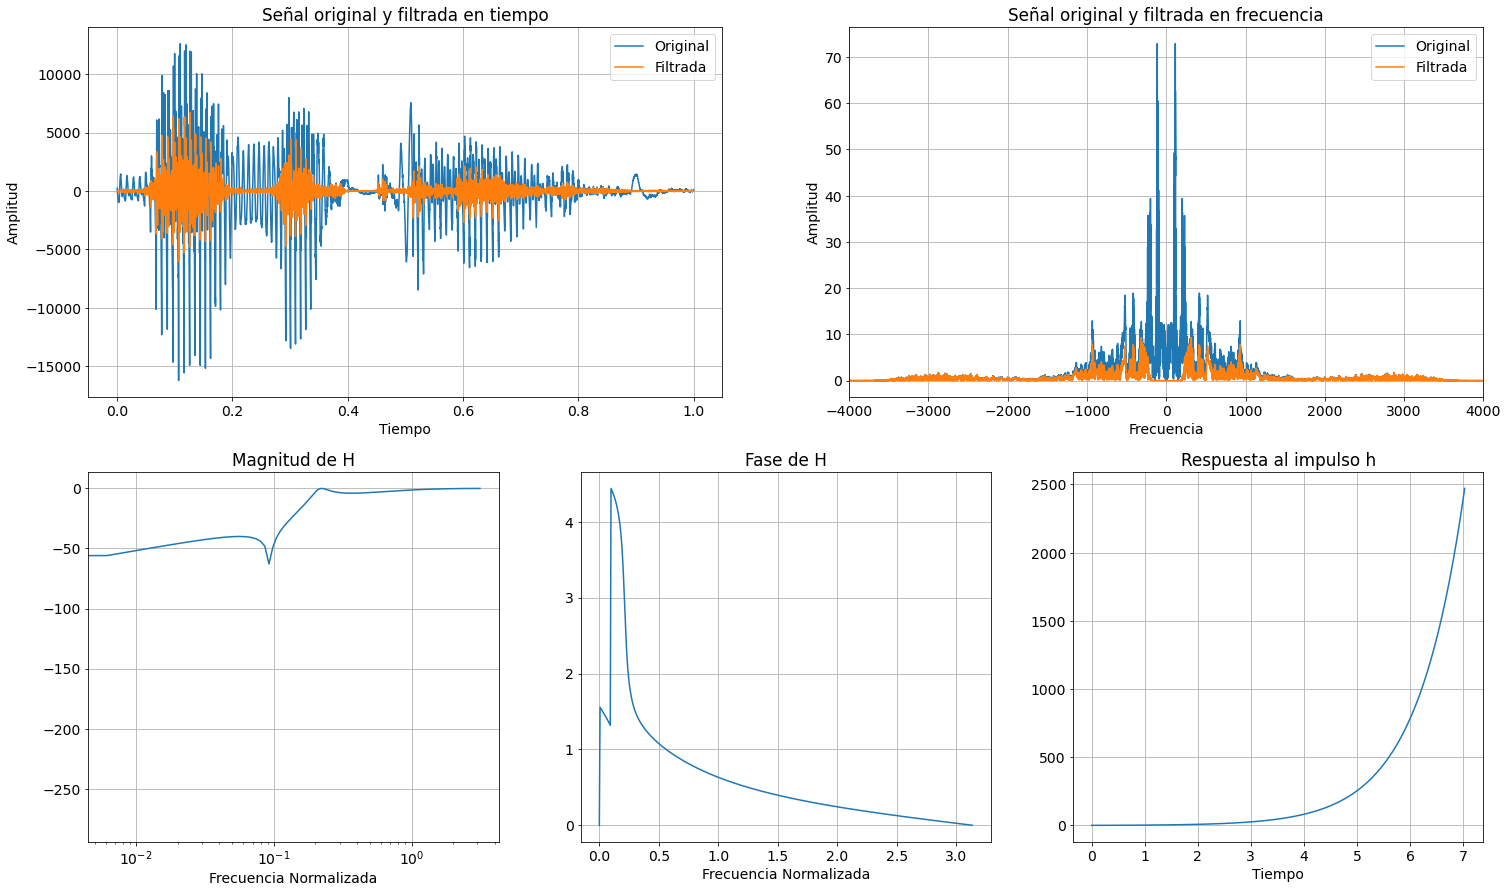

In [28]:
origsig=sigVM          #Señal a Filtrar
bfn, afn = b8, a8      #Tipo de Filtro (índices an, bn)
sig_filt = signal.filtfilt(bfn, afn, origsig)
wfn, hfn = signal.freqz(bfn,afn)
labelfilt = 'ellip highpass'

t,y=signal.impulse2((afn,bfn))
respuesta_fase = np.unwrap(np.angle(hfn))


Xo= fft(origsig,N)
X = fft(sig_filt,N)
lim = int(np.ceil((N+1)/2) - 1)
Xo = np.append(Xo[lim:1:-1], Xo[0:lim])
X = np.append(X[lim:1:-1], X[0:lim])
MXo = np.abs(Xo)
MXo = MXo / np.size(MXo)
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 14})
plt.subplot (221)
plt.title('Señal original y filtrada en tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(timevec,origsig, label = 'Original')
plt.plot(timevec,sig_filt, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (222)
plt.title('Señal original y filtrada en frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-4000,4000)
plt.plot(f,MXo, label = 'Original')
plt.plot(f,MX, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (234)
plt.title('Magnitud de H')
plt.xlabel('Frecuencia Normalizada')
plt.semilogx(wfn, 20 * np.log10(abs(hfn)), label=labelfilt)
plt.grid()
plt.subplot (235)
plt.title('Fase de H')
plt.xlabel('Frecuencia Normalizada')
plt.plot(wfn, respuesta_fase, label = labelfilt)
plt.grid()
plt.subplot (236)
plt.title('Respuesta al impulso h')
plt.xlabel('Tiempo')
plt.plot(t,y)
plt.grid()

In [29]:
ipd.Audio(origsig, rate=samplerate)     #Audio Original

In [30]:
ipd.Audio(sig_filt, rate=samplerate)     #Audio Filtrado

### Chirp - Filtro Butterworth Pasabanda

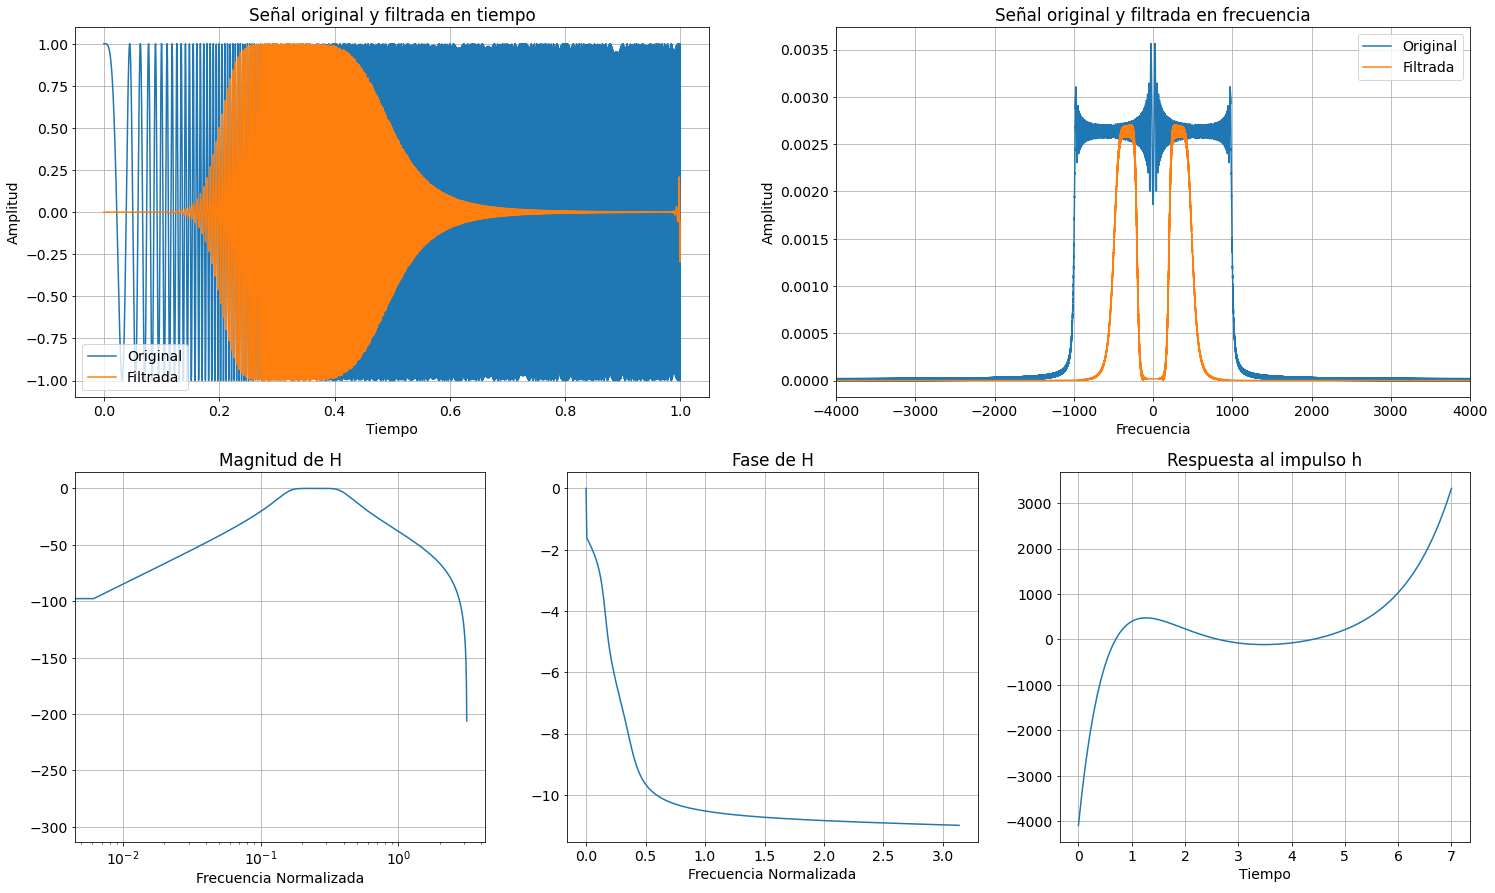

In [63]:
origsig=chirp          #Señal a Filtrar
bfn, afn = b9, a9      #Tipo de Filtro (índices an, bn)
sig_filt = signal.filtfilt(bfn, afn, origsig)
wfn, hfn = signal.freqz(bfn,afn)
labelfilt = 'butter bandpass'

t,y=signal.impulse2((afn,bfn))
respuesta_fase = np.unwrap(np.angle(hfn))


Xo= fft(origsig,N)
X = fft(sig_filt,N)
lim = int(np.ceil((N+1)/2) - 1)
Xo = np.append(Xo[lim:1:-1], Xo[0:lim])
X = np.append(X[lim:1:-1], X[0:lim])
MXo = np.abs(Xo)
MXo = MXo / np.size(MXo)
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 14})
plt.subplot (221)
plt.title('Señal original y filtrada en tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(timevec,origsig, label = 'Original')
plt.plot(timevec,sig_filt, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (222)
plt.title('Señal original y filtrada en frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-4000,4000)
plt.plot(f,MXo, label = 'Original')
plt.plot(f,MX, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (234)
plt.title('Magnitud de H')
plt.xlabel('Frecuencia Normalizada')
plt.semilogx(wfn, 20 * np.log10(abs(hfn)), label=labelfilt)
plt.grid()
plt.subplot (235)
plt.title('Fase de H')
plt.xlabel('Frecuencia Normalizada')
plt.plot(wfn, respuesta_fase, label = labelfilt)
plt.grid()
plt.subplot (236)
plt.title('Respuesta al impulso h')
plt.xlabel('Tiempo')
plt.plot(t,y)
plt.grid()

In [32]:
ipd.Audio(origsig, rate=samplerate)     #Audio Original

In [33]:
ipd.Audio(sig_filt, rate=samplerate)     #Audio Filtrado

### Suma de Senoides - Filtro Chebyshev1 Pasabanda

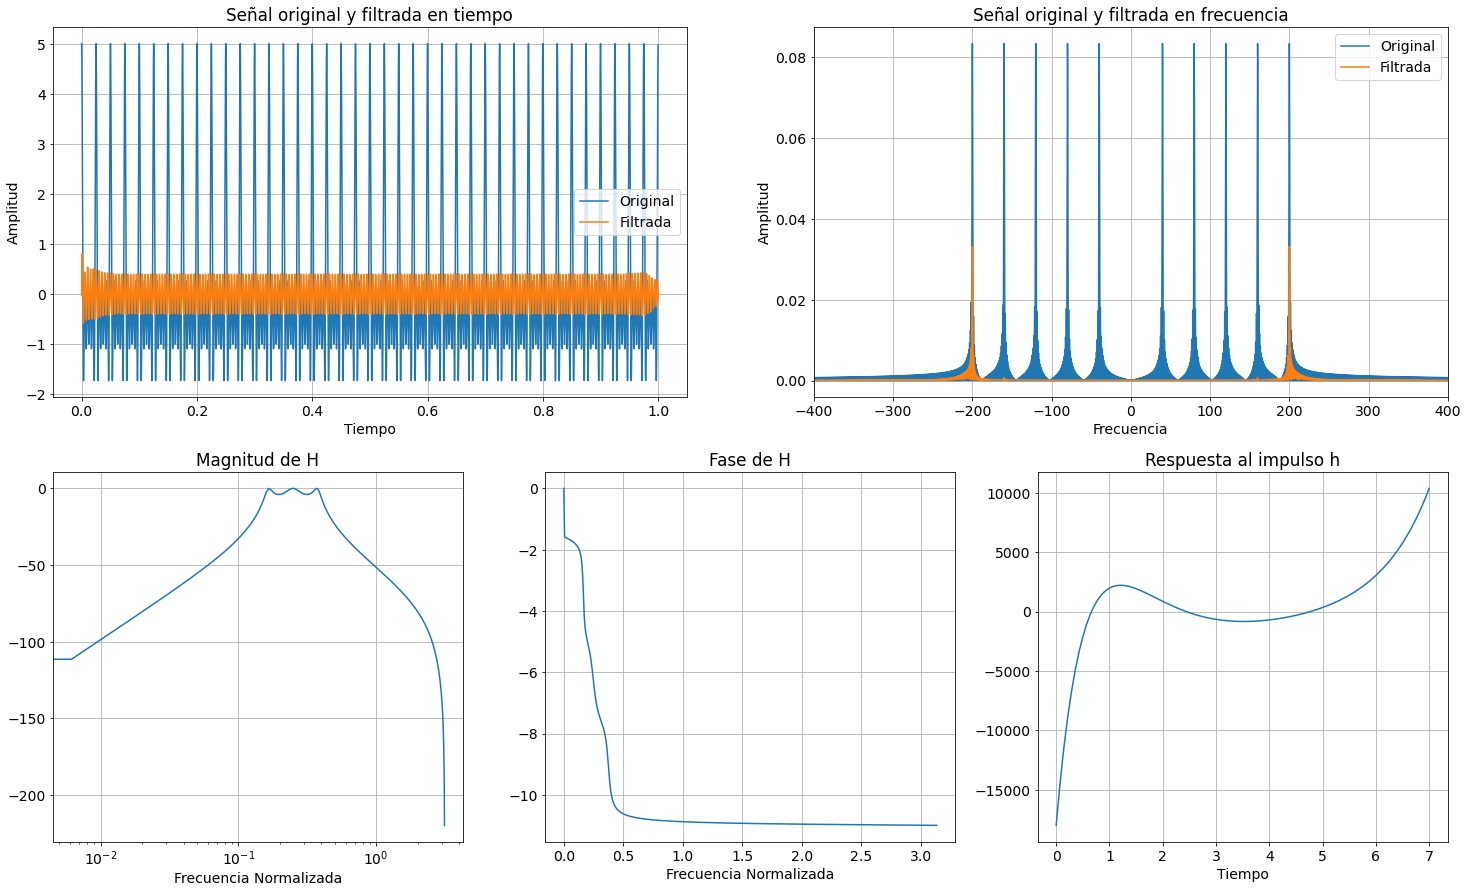

In [60]:
origsig=sinsum          #Señal a Filtrar
bfn, afn = b10, a10      #Tipo de Filtro (índices an, bn)
sig_filt = signal.filtfilt(bfn, afn, origsig)
wfn, hfn = signal.freqz(bfn,afn)
labelfilt = 'cheby1 bandpass'

t,y=signal.impulse2((afn,bfn))
respuesta_fase = np.unwrap(np.angle(hfn))


Xo= fft(origsig,N)
X = fft(sig_filt,N)
lim = int(np.ceil((N+1)/2) - 1)
Xo = np.append(Xo[lim:1:-1], Xo[0:lim])
X = np.append(X[lim:1:-1], X[0:lim])
MXo = np.abs(Xo)
MXo = MXo / np.size(MXo)
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 14})
plt.subplot (221)
plt.title('Señal original y filtrada en tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(timevec,origsig, label = 'Original')
plt.plot(timevec,sig_filt, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (222)
plt.title('Señal original y filtrada en frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-400,400)
plt.plot(f,MXo, label = 'Original')
plt.plot(f,MX, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (234)
plt.title('Magnitud de H')
plt.xlabel('Frecuencia Normalizada')
plt.semilogx(wfn, 20 * np.log10(np.where(0==hfn,0.00001,abs(hfn))), label=labelfilt)
plt.grid()
plt.subplot (235)
plt.title('Fase de H')
plt.xlabel('Frecuencia Normalizada')
plt.plot(wfn, respuesta_fase, label = labelfilt)
plt.grid()
plt.subplot (236)
plt.title('Respuesta al impulso h')
plt.xlabel('Tiempo')
plt.plot(t,y)
plt.grid()

In [35]:
ipd.Audio(origsig, rate=samplerate)     #Audio Original

In [36]:
ipd.Audio(sig_filt, rate=samplerate)     #Audio Filtrado

### Voz Masculina - Filtro Chebyshev2 Pasabanda

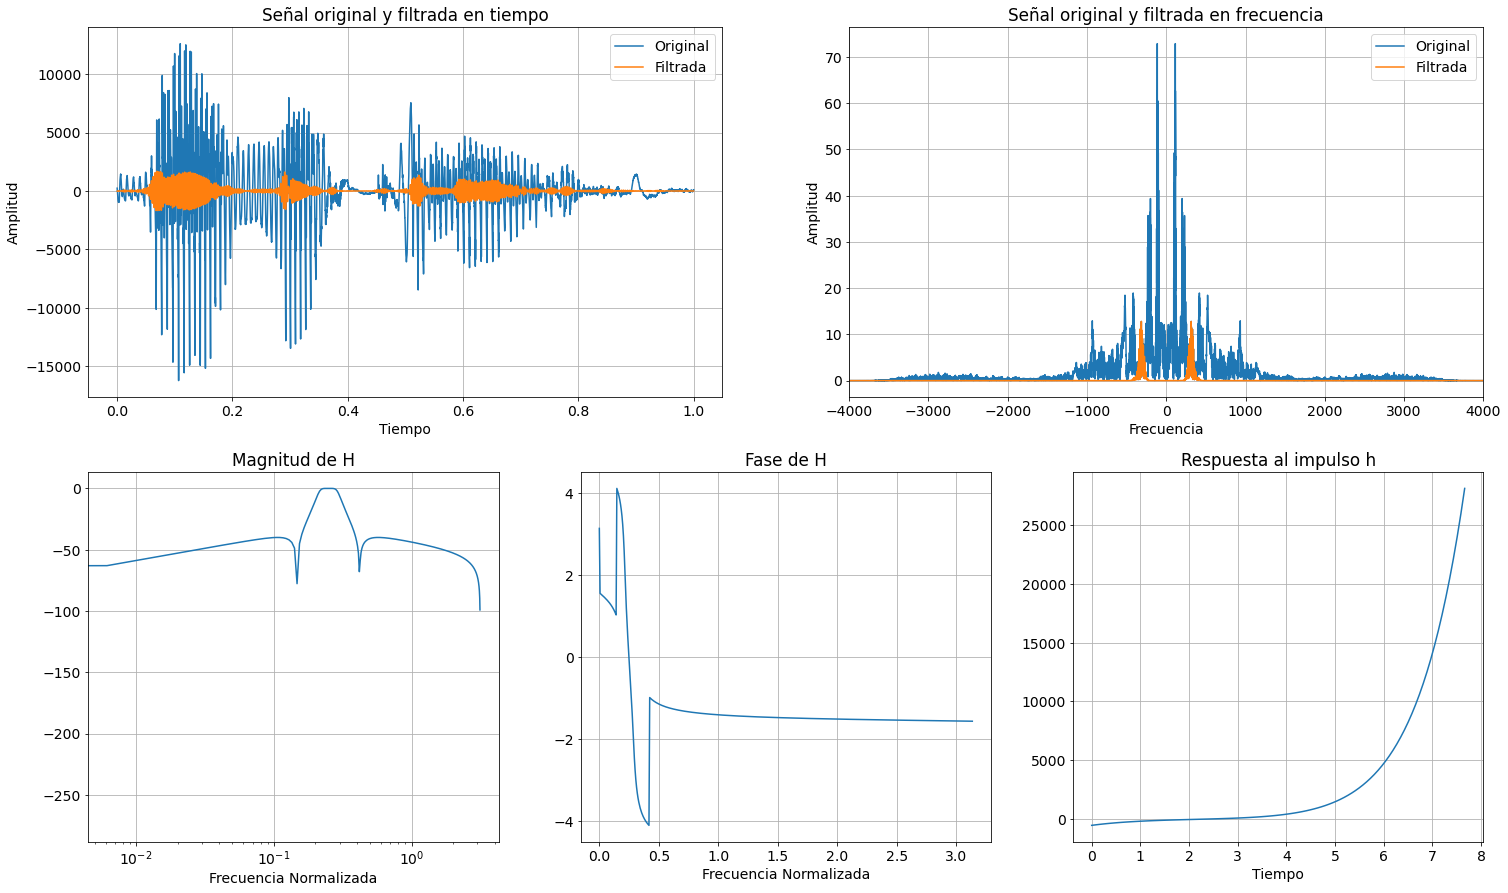

In [37]:
origsig=sigVM          #Señal a Filtrar
bfn, afn = b11, a11      #Tipo de Filtro (índices an, bn)
sig_filt = signal.filtfilt(bfn, afn, origsig)
wfn, hfn = signal.freqz(bfn,afn)
labelfilt = 'cheby2 bandpass'

t,y=signal.impulse2((afn,bfn))
respuesta_fase = np.unwrap(np.angle(hfn))


Xo= fft(origsig,N)
X = fft(sig_filt,N)
lim = int(np.ceil((N+1)/2) - 1)
Xo = np.append(Xo[lim:1:-1], Xo[0:lim])
X = np.append(X[lim:1:-1], X[0:lim])
MXo = np.abs(Xo)
MXo = MXo / np.size(MXo)
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 14})
plt.subplot (221)
plt.title('Señal original y filtrada en tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(timevec,origsig, label = 'Original')
plt.plot(timevec,sig_filt, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (222)
plt.title('Señal original y filtrada en frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-4000,4000)
plt.plot(f,MXo, label = 'Original')
plt.plot(f,MX, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (234)
plt.title('Magnitud de H')
plt.xlabel('Frecuencia Normalizada')
plt.semilogx(wfn, 20 * np.log10(abs(hfn)), label=labelfilt)
plt.grid()
plt.subplot (235)
plt.title('Fase de H')
plt.xlabel('Frecuencia Normalizada')
plt.plot(wfn, respuesta_fase, label = labelfilt)
plt.grid()
plt.subplot (236)
plt.title('Respuesta al impulso h')
plt.xlabel('Tiempo')
plt.plot(t,y)
plt.grid()

In [38]:
ipd.Audio(origsig, rate=samplerate)     #Audio Original

In [39]:
ipd.Audio(sig_filt, rate=samplerate)     #Audio Filtrado

### Voz Femenina - Filtro Elíptico Pasabanda

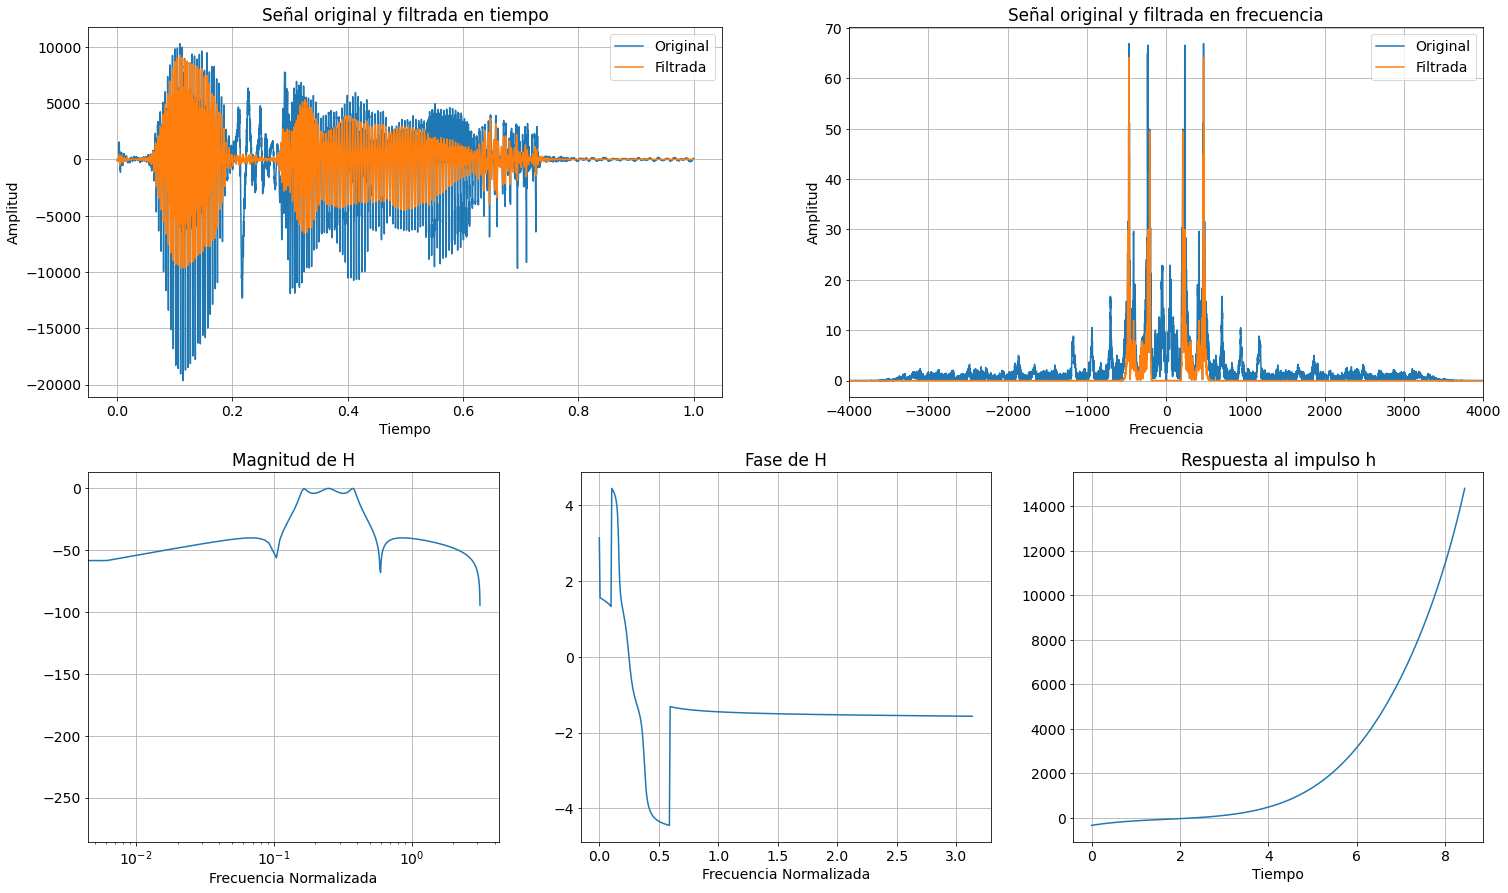

In [40]:
origsig=sigVF          #Señal a Filtrar
bfn, afn = b12, a12      #Tipo de Filtro (índices an, bn)
sig_filt = signal.filtfilt(bfn, afn, origsig)
wfn, hfn = signal.freqz(bfn,afn)
labelfilt = 'ellip bandpass'

t,y=signal.impulse2((afn,bfn))
respuesta_fase = np.unwrap(np.angle(hfn))


Xo= fft(origsig,N)
X = fft(sig_filt,N)
lim = int(np.ceil((N+1)/2) - 1)
Xo = np.append(Xo[lim:1:-1], Xo[0:lim])
X = np.append(X[lim:1:-1], X[0:lim])
MXo = np.abs(Xo)
MXo = MXo / np.size(MXo)
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 14})
plt.subplot (221)
plt.title('Señal original y filtrada en tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(timevec,origsig, label = 'Original')
plt.plot(timevec,sig_filt, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (222)
plt.title('Señal original y filtrada en frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-4000,4000)
plt.plot(f,MXo, label = 'Original')
plt.plot(f,MX, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (234)
plt.title('Magnitud de H')
plt.xlabel('Frecuencia Normalizada')
plt.semilogx(wfn, 20 * np.log10(abs(hfn)), label=labelfilt)
plt.grid()
plt.subplot (235)
plt.title('Fase de H')
plt.xlabel('Frecuencia Normalizada')
plt.plot(wfn, respuesta_fase, label = labelfilt)
plt.grid()
plt.subplot (236)
plt.title('Respuesta al impulso h')
plt.xlabel('Tiempo')
plt.plot(t,y)
plt.grid()

In [41]:
ipd.Audio(origsig, rate=samplerate)     #Audio Original

In [42]:
ipd.Audio(sig_filt, rate=samplerate)     #Audio Filtrado

### Suma de Senoides - Filtro Butterworth Rechazabanda

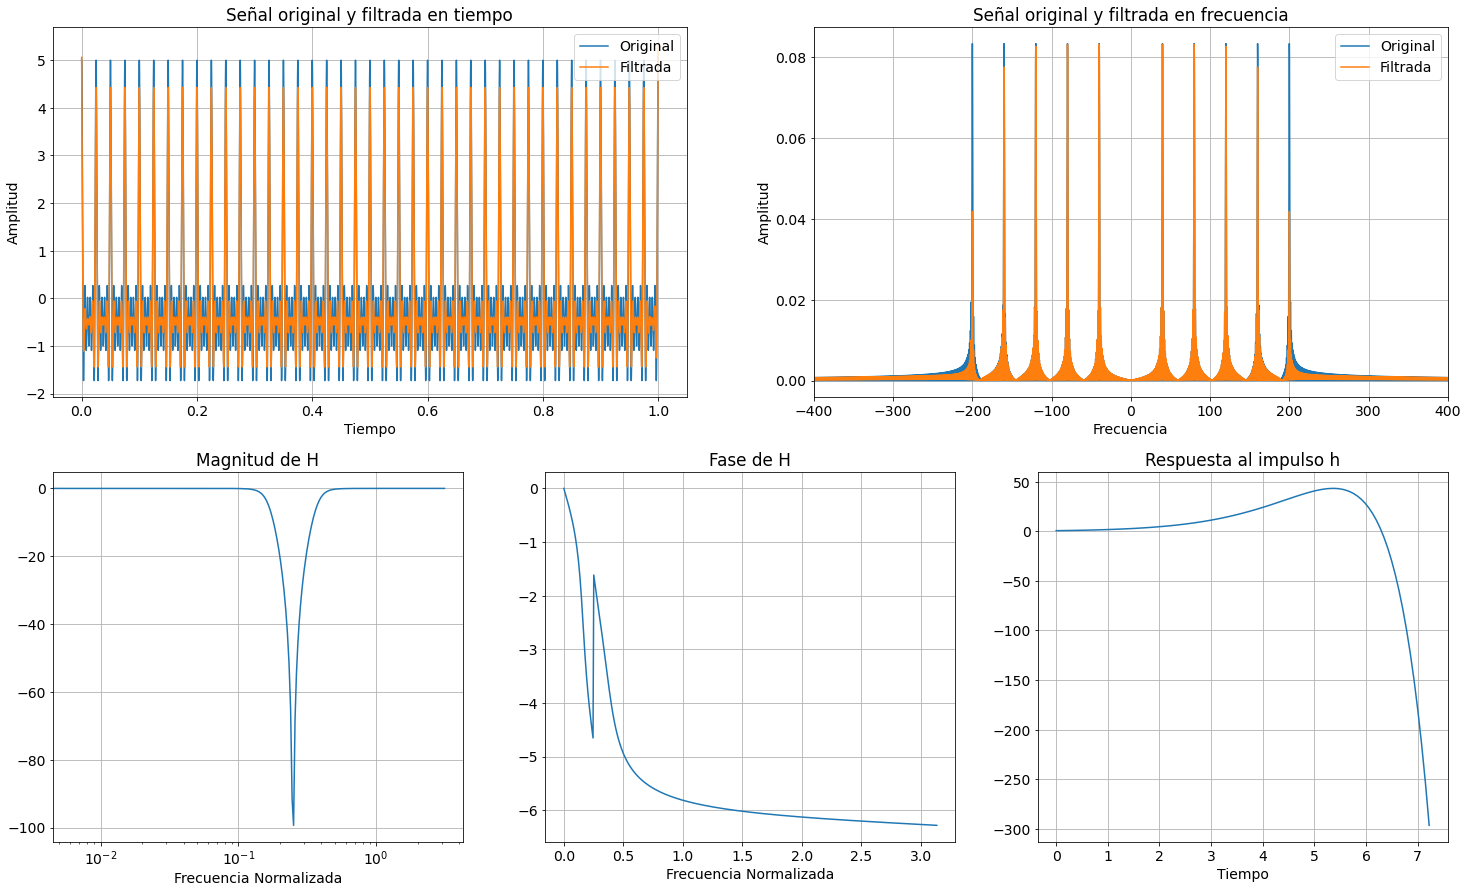

In [61]:
origsig=sinsum          #Señal a Filtrar
bfn, afn = b13, a13      #Tipo de Filtro (índices an, bn)
sig_filt = signal.filtfilt(bfn, afn, origsig)
wfn, hfn = signal.freqz(bfn,afn)
labelfilt = 'butter bandkill'

t,y=signal.impulse2((afn,bfn))
respuesta_fase = np.unwrap(np.angle(hfn))


Xo= fft(origsig,N)
X = fft(sig_filt,N)
lim = int(np.ceil((N+1)/2) - 1)
Xo = np.append(Xo[lim:1:-1], Xo[0:lim])
X = np.append(X[lim:1:-1], X[0:lim])
MXo = np.abs(Xo)
MXo = MXo / np.size(MXo)
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 14})
plt.subplot (221)
plt.title('Señal original y filtrada en tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(timevec,origsig, label = 'Original')
plt.plot(timevec,sig_filt, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (222)
plt.title('Señal original y filtrada en frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-400,400)
plt.plot(f,MXo, label = 'Original')
plt.plot(f,MX, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (234)
plt.title('Magnitud de H')
plt.xlabel('Frecuencia Normalizada')
plt.semilogx(wfn, 20 * np.log10(abs(hfn)), label=labelfilt)
plt.grid()
plt.subplot (235)
plt.title('Fase de H')
plt.xlabel('Frecuencia Normalizada')
plt.plot(wfn, respuesta_fase, label = labelfilt)
plt.grid()
plt.subplot (236)
plt.title('Respuesta al impulso h')
plt.xlabel('Tiempo')
plt.plot(t,y)
plt.grid()

In [44]:
ipd.Audio(origsig, rate=samplerate)     #Audio Original

In [45]:
ipd.Audio(sig_filt, rate=samplerate)     #Audio Filtrado

### Voz Masculina - Filtro Chebyshev1 Rechazabanda

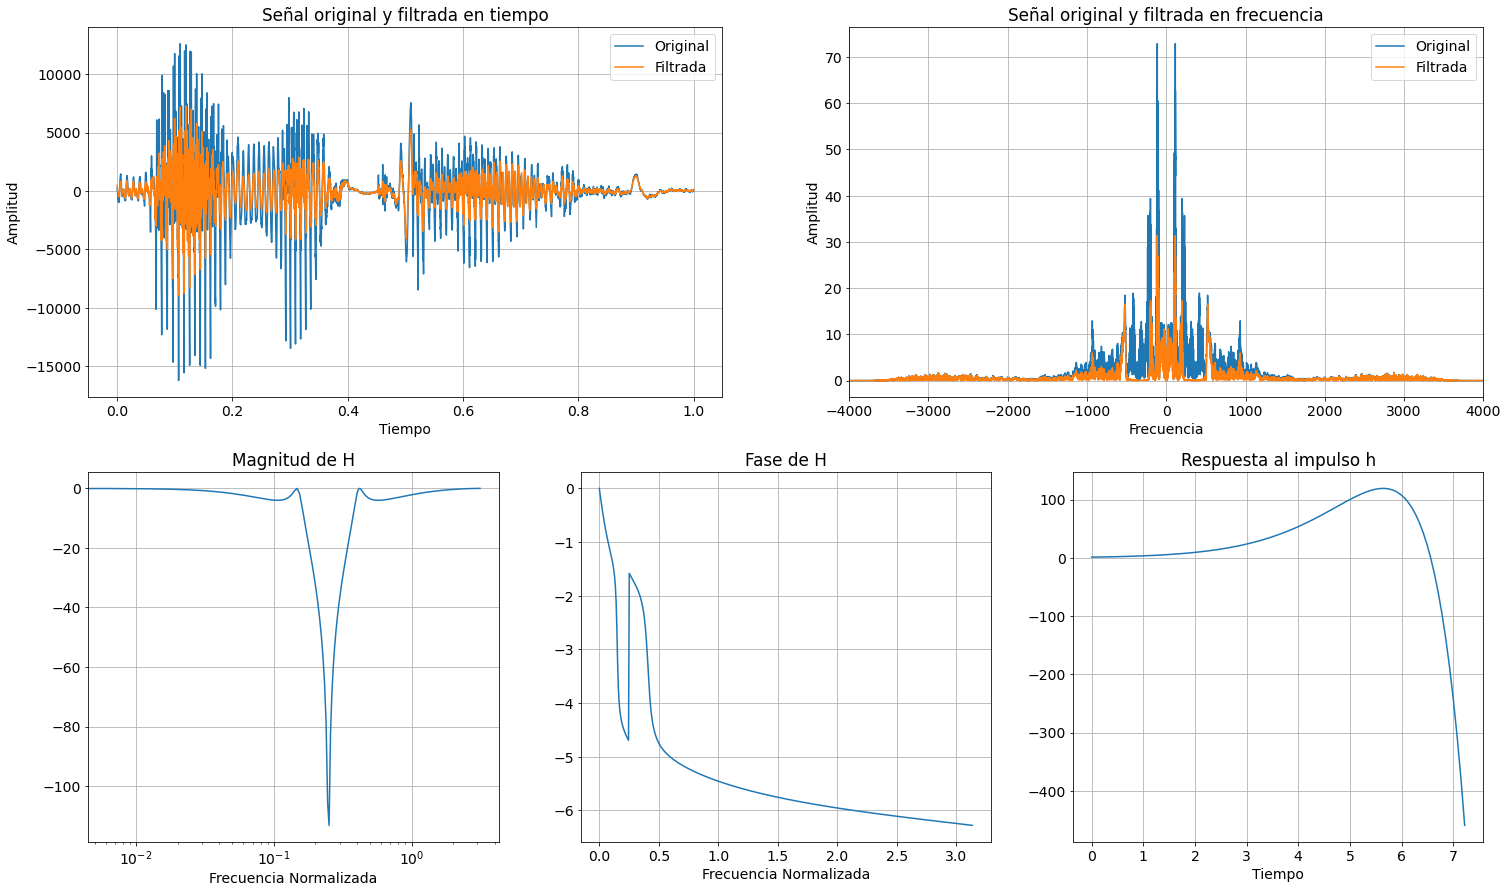

In [46]:
origsig=sigVM          #Señal a Filtrar
bfn, afn = b14, a14      #Tipo de Filtro (índices an, bn)
sig_filt = signal.filtfilt(bfn, afn, origsig)
wfn, hfn = signal.freqz(bfn,afn)
labelfilt = 'cheby1 bandkill'

t,y=signal.impulse2((afn,bfn))
respuesta_fase = np.unwrap(np.angle(hfn))


Xo= fft(origsig,N)
X = fft(sig_filt,N)
lim = int(np.ceil((N+1)/2) - 1)
Xo = np.append(Xo[lim:1:-1], Xo[0:lim])
X = np.append(X[lim:1:-1], X[0:lim])
MXo = np.abs(Xo)
MXo = MXo / np.size(MXo)
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 14})
plt.subplot (221)
plt.title('Señal original y filtrada en tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(timevec,origsig, label = 'Original')
plt.plot(timevec,sig_filt, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (222)
plt.title('Señal original y filtrada en frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-4000,4000)
plt.plot(f,MXo, label = 'Original')
plt.plot(f,MX, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (234)
plt.title('Magnitud de H')
plt.xlabel('Frecuencia Normalizada')
plt.semilogx(wfn, 20 * np.log10(abs(hfn)), label=labelfilt)
plt.grid()
plt.subplot (235)
plt.title('Fase de H')
plt.xlabel('Frecuencia Normalizada')
plt.plot(wfn, respuesta_fase, label = labelfilt)
plt.grid()
plt.subplot (236)
plt.title('Respuesta al impulso h')
plt.xlabel('Tiempo')
plt.plot(t,y)
plt.grid()

In [47]:
ipd.Audio(origsig, rate=samplerate)     #Audio Original

In [48]:
ipd.Audio(sig_filt, rate=samplerate)     #Audio Filtrado

### Voz Femenina - Filtro Chebyshev2 Rechazabanda

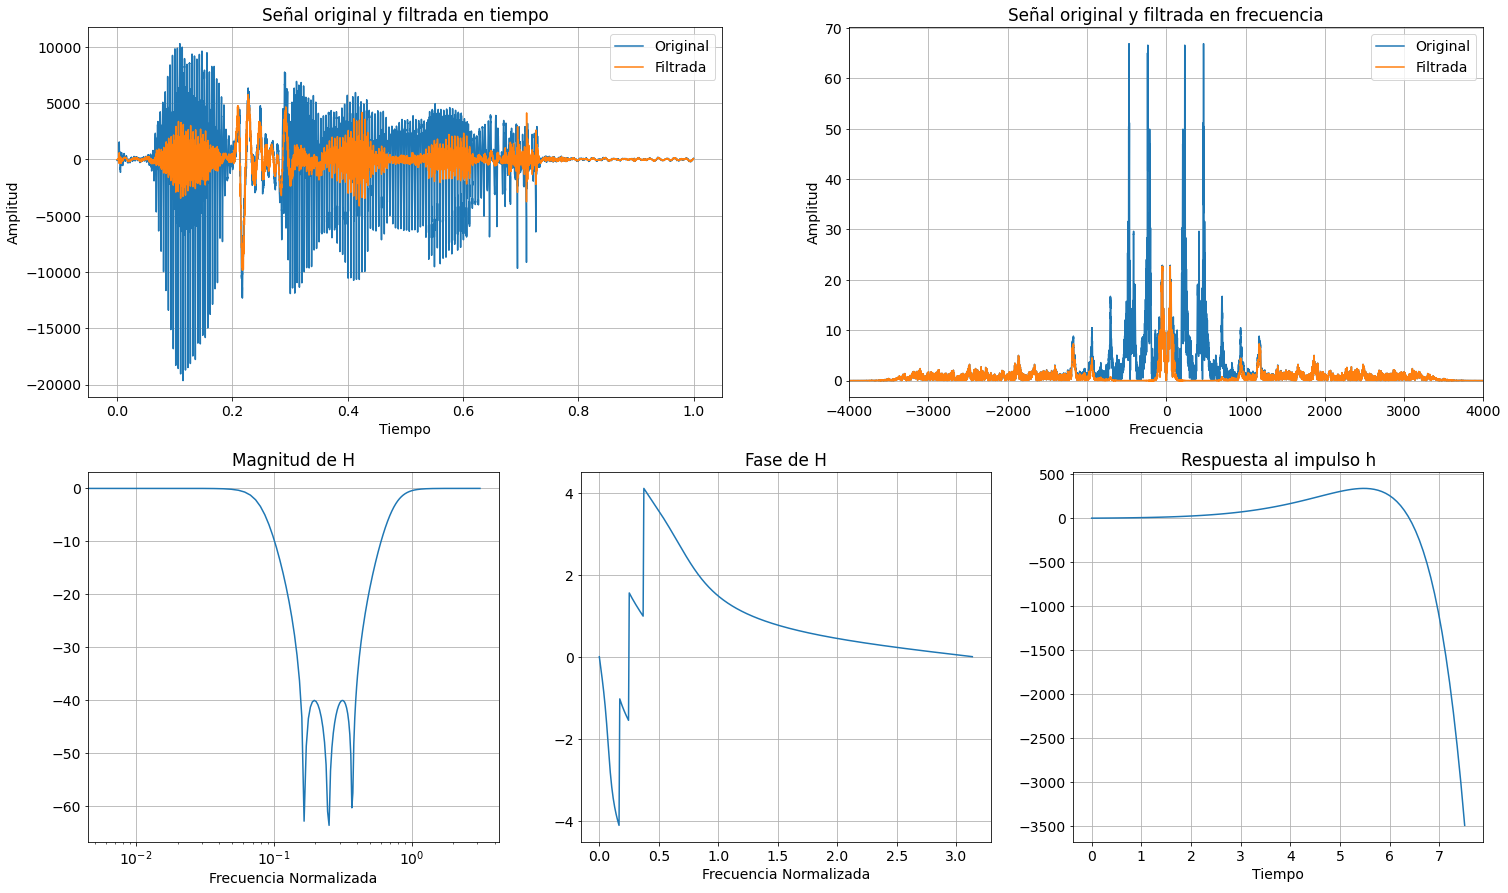

In [49]:
origsig=sigVF          #Señal a Filtrar
bfn, afn = b15, a15      #Tipo de Filtro (índices an, bn)
sig_filt = signal.filtfilt(bfn, afn, origsig)
wfn, hfn = signal.freqz(bfn,afn)
labelfilt = 'cheby2 bandkill'

t,y=signal.impulse2((afn,bfn))
respuesta_fase = np.unwrap(np.angle(hfn))


Xo= fft(origsig,N)
X = fft(sig_filt,N)
lim = int(np.ceil((N+1)/2) - 1)
Xo = np.append(Xo[lim:1:-1], Xo[0:lim])
X = np.append(X[lim:1:-1], X[0:lim])
MXo = np.abs(Xo)
MXo = MXo / np.size(MXo)
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 14})
plt.subplot (221)
plt.title('Señal original y filtrada en tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(timevec,origsig, label = 'Original')
plt.plot(timevec,sig_filt, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (222)
plt.title('Señal original y filtrada en frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-4000,4000)
plt.plot(f,MXo, label = 'Original')
plt.plot(f,MX, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (234)
plt.title('Magnitud de H')
plt.xlabel('Frecuencia Normalizada')
plt.semilogx(wfn, 20 * np.log10(abs(hfn)), label=labelfilt)
plt.grid()
plt.subplot (235)
plt.title('Fase de H')
plt.xlabel('Frecuencia Normalizada')
plt.plot(wfn, respuesta_fase, label = labelfilt)
plt.grid()
plt.subplot (236)
plt.title('Respuesta al impulso h')
plt.xlabel('Tiempo')
plt.plot(t,y)
plt.grid()

In [50]:
ipd.Audio(origsig, rate=samplerate)     #Audio Original

In [51]:
ipd.Audio(sig_filt, rate=samplerate)     #Audio Filtrado

### Chirp - Filtro Elíptico Rechazabanda

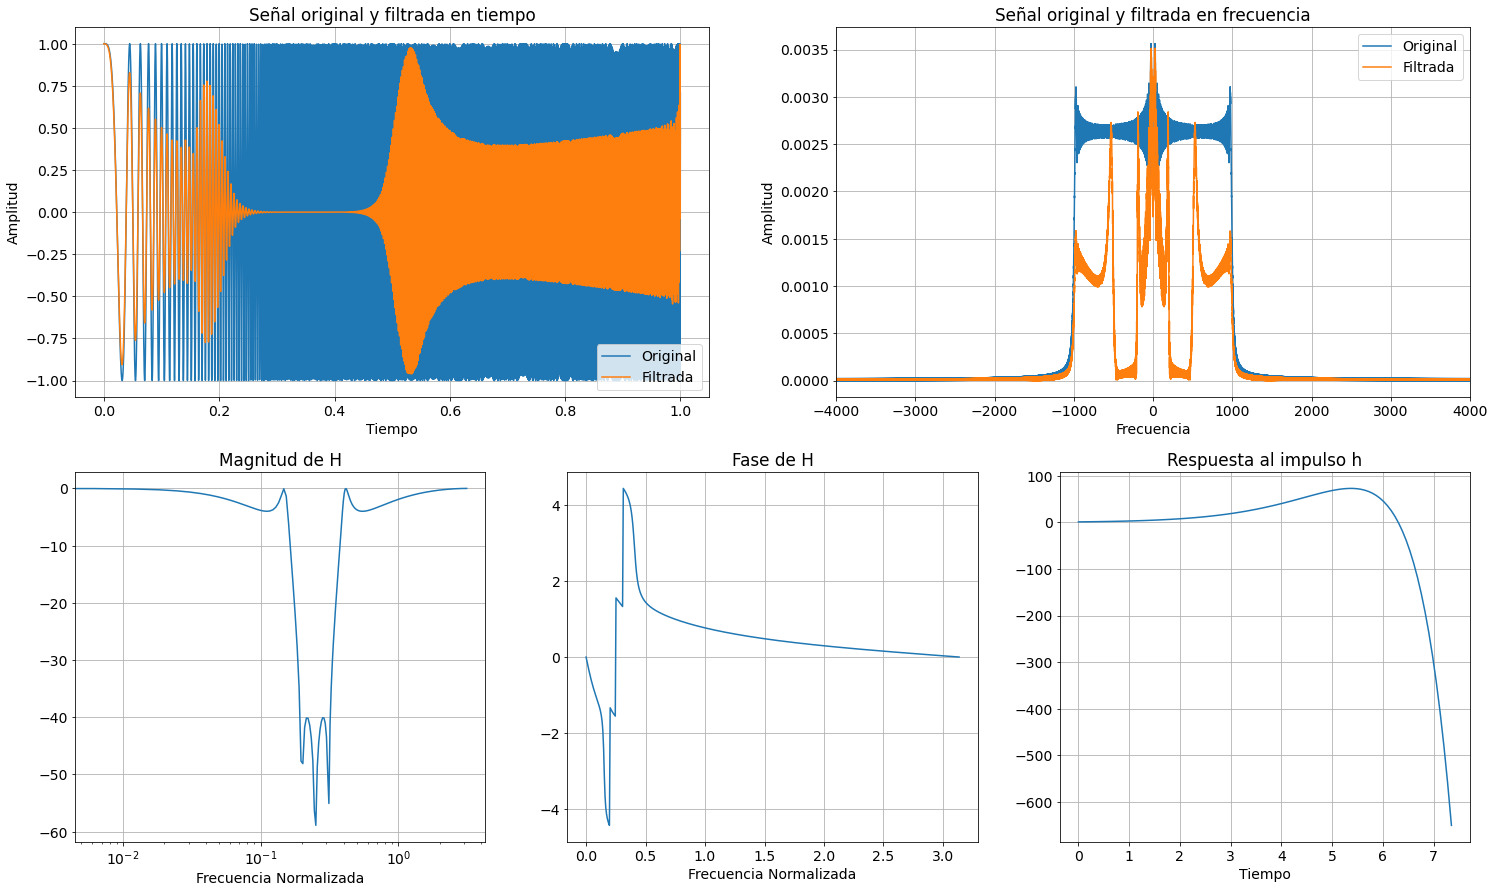

In [52]:
origsig=chirp          #Señal a Filtrar
bfn, afn = b16, a16      #Tipo de Filtro (índices an, bn)
sig_filt = signal.filtfilt(bfn, afn, origsig)
wfn, hfn = signal.freqz(bfn,afn)
labelfilt = 'ellip bandkill'

t,y=signal.impulse2((afn,bfn))
respuesta_fase = np.unwrap(np.angle(hfn))


Xo= fft(origsig,N)
X = fft(sig_filt,N)
lim = int(np.ceil((N+1)/2) - 1)
Xo = np.append(Xo[lim:1:-1], Xo[0:lim])
X = np.append(X[lim:1:-1], X[0:lim])
MXo = np.abs(Xo)
MXo = MXo / np.size(MXo)
MX = np.abs(X)
MX = MX / np.size(MX)
f =np.linspace((-N/2), (N/2), N-1) * samplerate/N



plt.figure(figsize=(25,15))
plt.rcParams.update({'font.size': 14})
plt.subplot (221)
plt.title('Señal original y filtrada en tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.plot(timevec,origsig, label = 'Original')
plt.plot(timevec,sig_filt, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (222)
plt.title('Señal original y filtrada en frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.xlim(-4000,4000)
plt.plot(f,MXo, label = 'Original')
plt.plot(f,MX, label = 'Filtrada')
plt.legend()
plt.grid()
plt.subplot (234)
plt.title('Magnitud de H')
plt.xlabel('Frecuencia Normalizada')
plt.semilogx(wfn, 20 * np.log10(abs(hfn)), label=labelfilt)
plt.grid()
plt.subplot (235)
plt.title('Fase de H')
plt.xlabel('Frecuencia Normalizada')
plt.plot(wfn, respuesta_fase, label = labelfilt)
plt.grid()
plt.subplot (236)
plt.title('Respuesta al impulso h')
plt.xlabel('Tiempo')
plt.plot(t,y)
plt.grid()

In [53]:
ipd.Audio(origsig, rate=samplerate)     #Audio Original

In [54]:
ipd.Audio(sig_filt, rate=samplerate)     #Audio Filtrado